# CAN WE ACTUALLY PREDICT THE A VALUE OF A PROPERTY?

The purpose of this documentation is to explore the possibility of deploying a supervise machine learning model to predict property prices in Belgium. The exploratory data analysis has been done through the last project. The goal of this project is to be able to come with the most appropriate supervised machine learning model to predict property prices. 

# MODEL SELECTION

#### CATEGORICAL VARIABLE

### MODEL SELECTION FOR CATEGORICAL VARIABLES

#### SIMPLE KNeighborsClassifier Classification Model with LabelEncoder

The code block below is my attempt at creating a classification model using 5 normalised categorical variable, namely "type" (meaning property type), "district", "postalcode", "province", and "region"

I am using a PimpMyData which is a class module I specifically program for this project. I will use the PimpMyData.dataframe_generator to import the previously retrieved dataset from data exploration. 

Then I subset the df_categoricals and only select the 5 variable I have mentioned. 

To normalise variables that are still in stirng form, I use LabelEncoder, one of the modules in sklearn.preprocessing to assign numerical labels in to the string datas of "type". 

Then I initated the train_test_split with test_size of 2.0

After numerous trial and errors, I came into the conclusion that setting the parameter of n_neighbours to 11 yields the best accuracy/ 

In [1]:
####################################################################################### INITIALIZING CURRENT_DIR ################################################################################
import os

def CURRENT_DIR():
    cwd = os.getcwd()
    return os.chdir(cwd[:(cwd.index("Eliza")+5)])

CURRENT_DIR()

In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# loading ImmoConfig, PimpMyData
from src.pimp_my_data import PimpMyData


# graph display setting
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={"figure.figsize": (30, 30)})
sns.set(font_scale=3)




Accuracy: 0.7102659245516388
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62      1095
           1       0.00      0.00      0.00       114
           2       0.77      0.81      0.79      1979
           3       0.00      0.00      0.00        46

    accuracy                           0.71      3234
   macro avg       0.34      0.36      0.35      3234
weighted avg       0.67      0.71      0.69      3234



c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

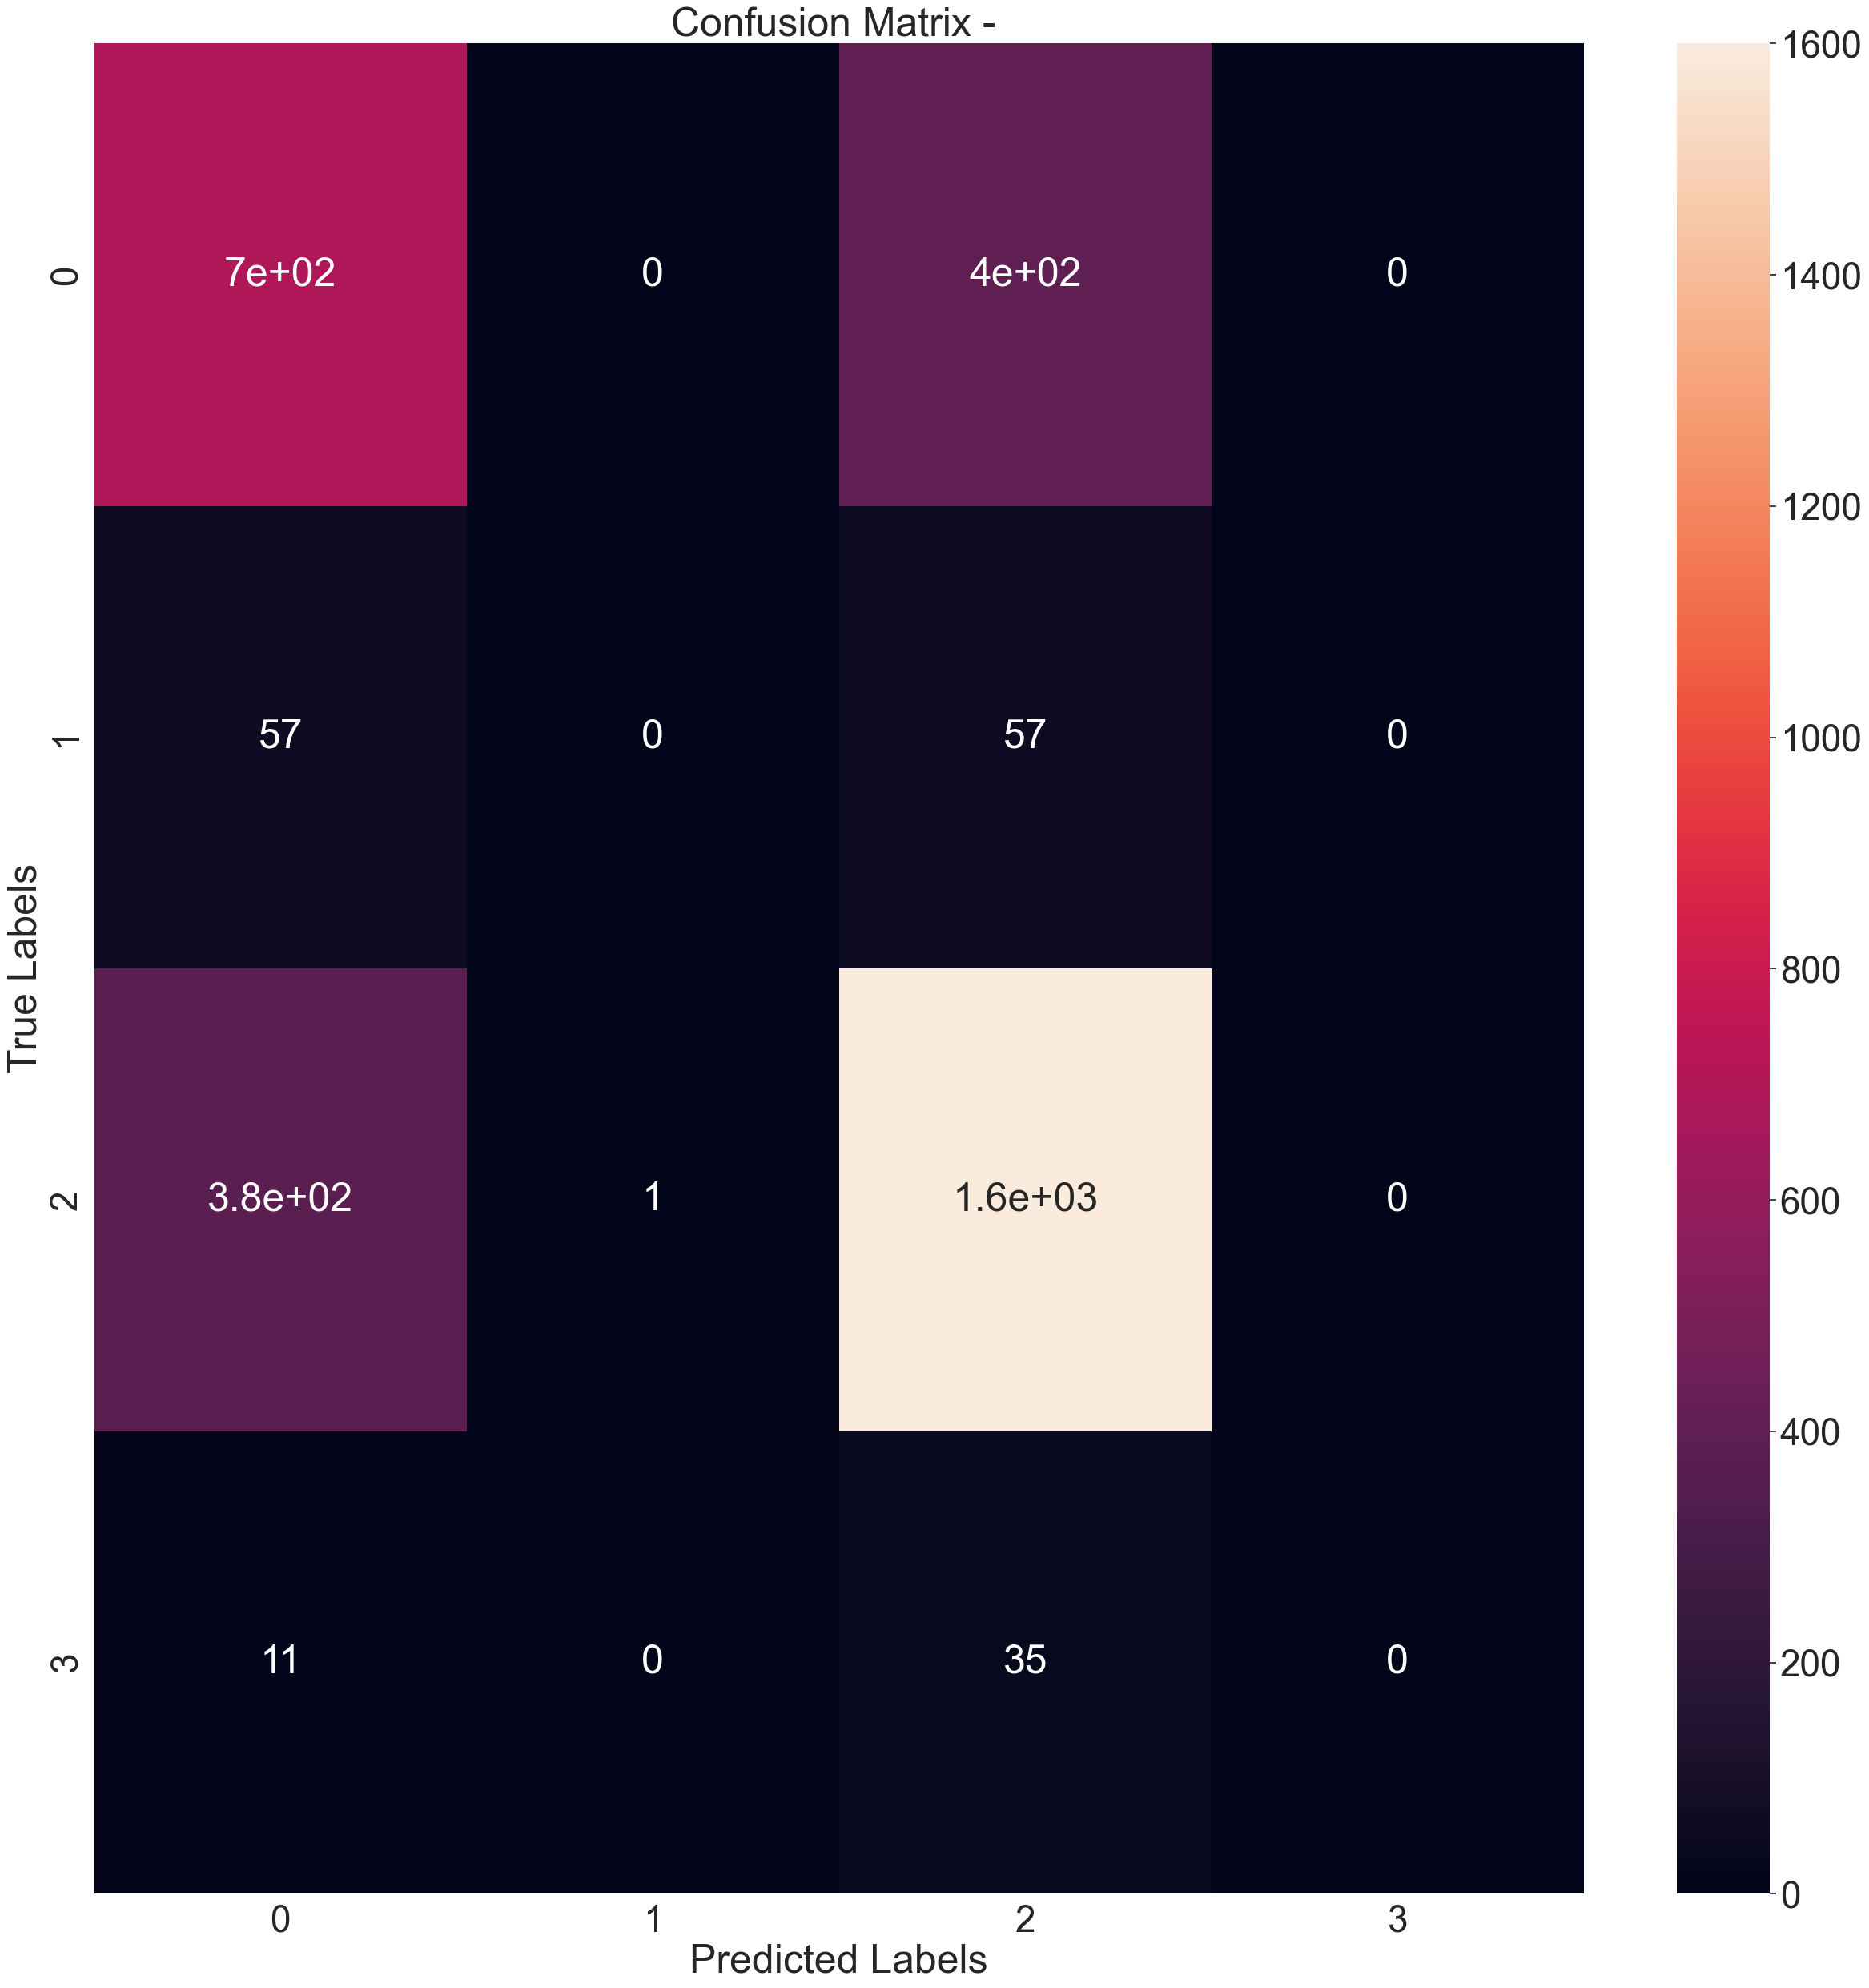

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading data using PimpMyData 
pimp_data = PimpMyData()
df_categoricals = pimp_data.dataframe_generator("data", "categoricals.csv")

# Select relevant columns for analysis
df_chosen_cat = df_categoricals[[ "type", "district", "postalcode", "province", "region"]]

# encode string
label_encoder = LabelEncoder()
df_chosen_cat = df_chosen_cat.apply(label_encoder.fit_transform)


# Assigning X and y
y = df_chosen_cat["type"].values
X = df_chosen_cat.drop("type", axis=1).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNeighborsClassifier with k=10
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualizing confusion matrix
sns.heatmap(data=cm, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - ")


# Create a classification report
cls_report = classification_report(y_test, y_pred)
print("Classification Report:\n", cls_report)



Let's Evaluate this model 

 1. The Accuracy of this model is 0.718. which indicates that approximately 72% of the predicted samples are correct
 2. Precision, which is the ability of the classifier not to label a sample as positive (in this case, a particular class) when it is negative. 
         - Precision for class 0: 0.62
         - Precision for class 1: 0.00
         - Precision for class 2: 0.78
         - Precision for class 3: 0.00
    
    The number above means that the model can predict within 78% accuracy that the predicted value is correct and not lead to False Positive

 3. The classification report provides an overview of the performance of the classifier for each class and overall.
It shows that the classifier performs well for some classes like class 0 and class 2, which is presumably represent Flanders and Brussels. The prediction of those 2 classes are done with a relatively high precision, recall, and F1-score.
 4. However, the classifier performs poorly for other classes (e.g., class 1 and class 3) with low precision, recall, and F1-score. I personally do not figure out the sognificance of F1-Score in this occaision. 
 5. However, the overall accuracy of the classifier is 72%, which means it correctly predicts 72% of the samples in the test dataset.
The weighted average F1-score (0.70) provides a good measure of overall classifier performance, considering class imbalances in the dataset.
 5. Overall, the classifier seems to perform well for some classes but struggles with others. Depending on the specific requirements of your application, you may need to investigate further to improve the performance on classes with low precision and recall.

#### KNeighborsClassifier Classification Model using LabelEncoder, StandardScaler, OneHotEncoder and ColumnTransformer

C:\Users\dimas\AppData\Local\Temp\ipykernel_17044\3269922235.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen_cat["type"] = label_encoder.fit_transform(df_chosen_cat["type"])


Cross-Validation Scores: [0.26499691 0.52875696 0.54205318 0.53772418 0.5148423 ]
Mean Cross-Validation Accuracy: 0.47767470624613484


c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5583
           1       0.00      0.00      0.00       597
           2       0.61      0.88      0.72      9778
           3       0.03      0.32      0.06       212

    accuracy                           0.53     16170
   macro avg       0.16      0.30      0.19     16170
weighted avg       0.37      0.53      0.44     16170



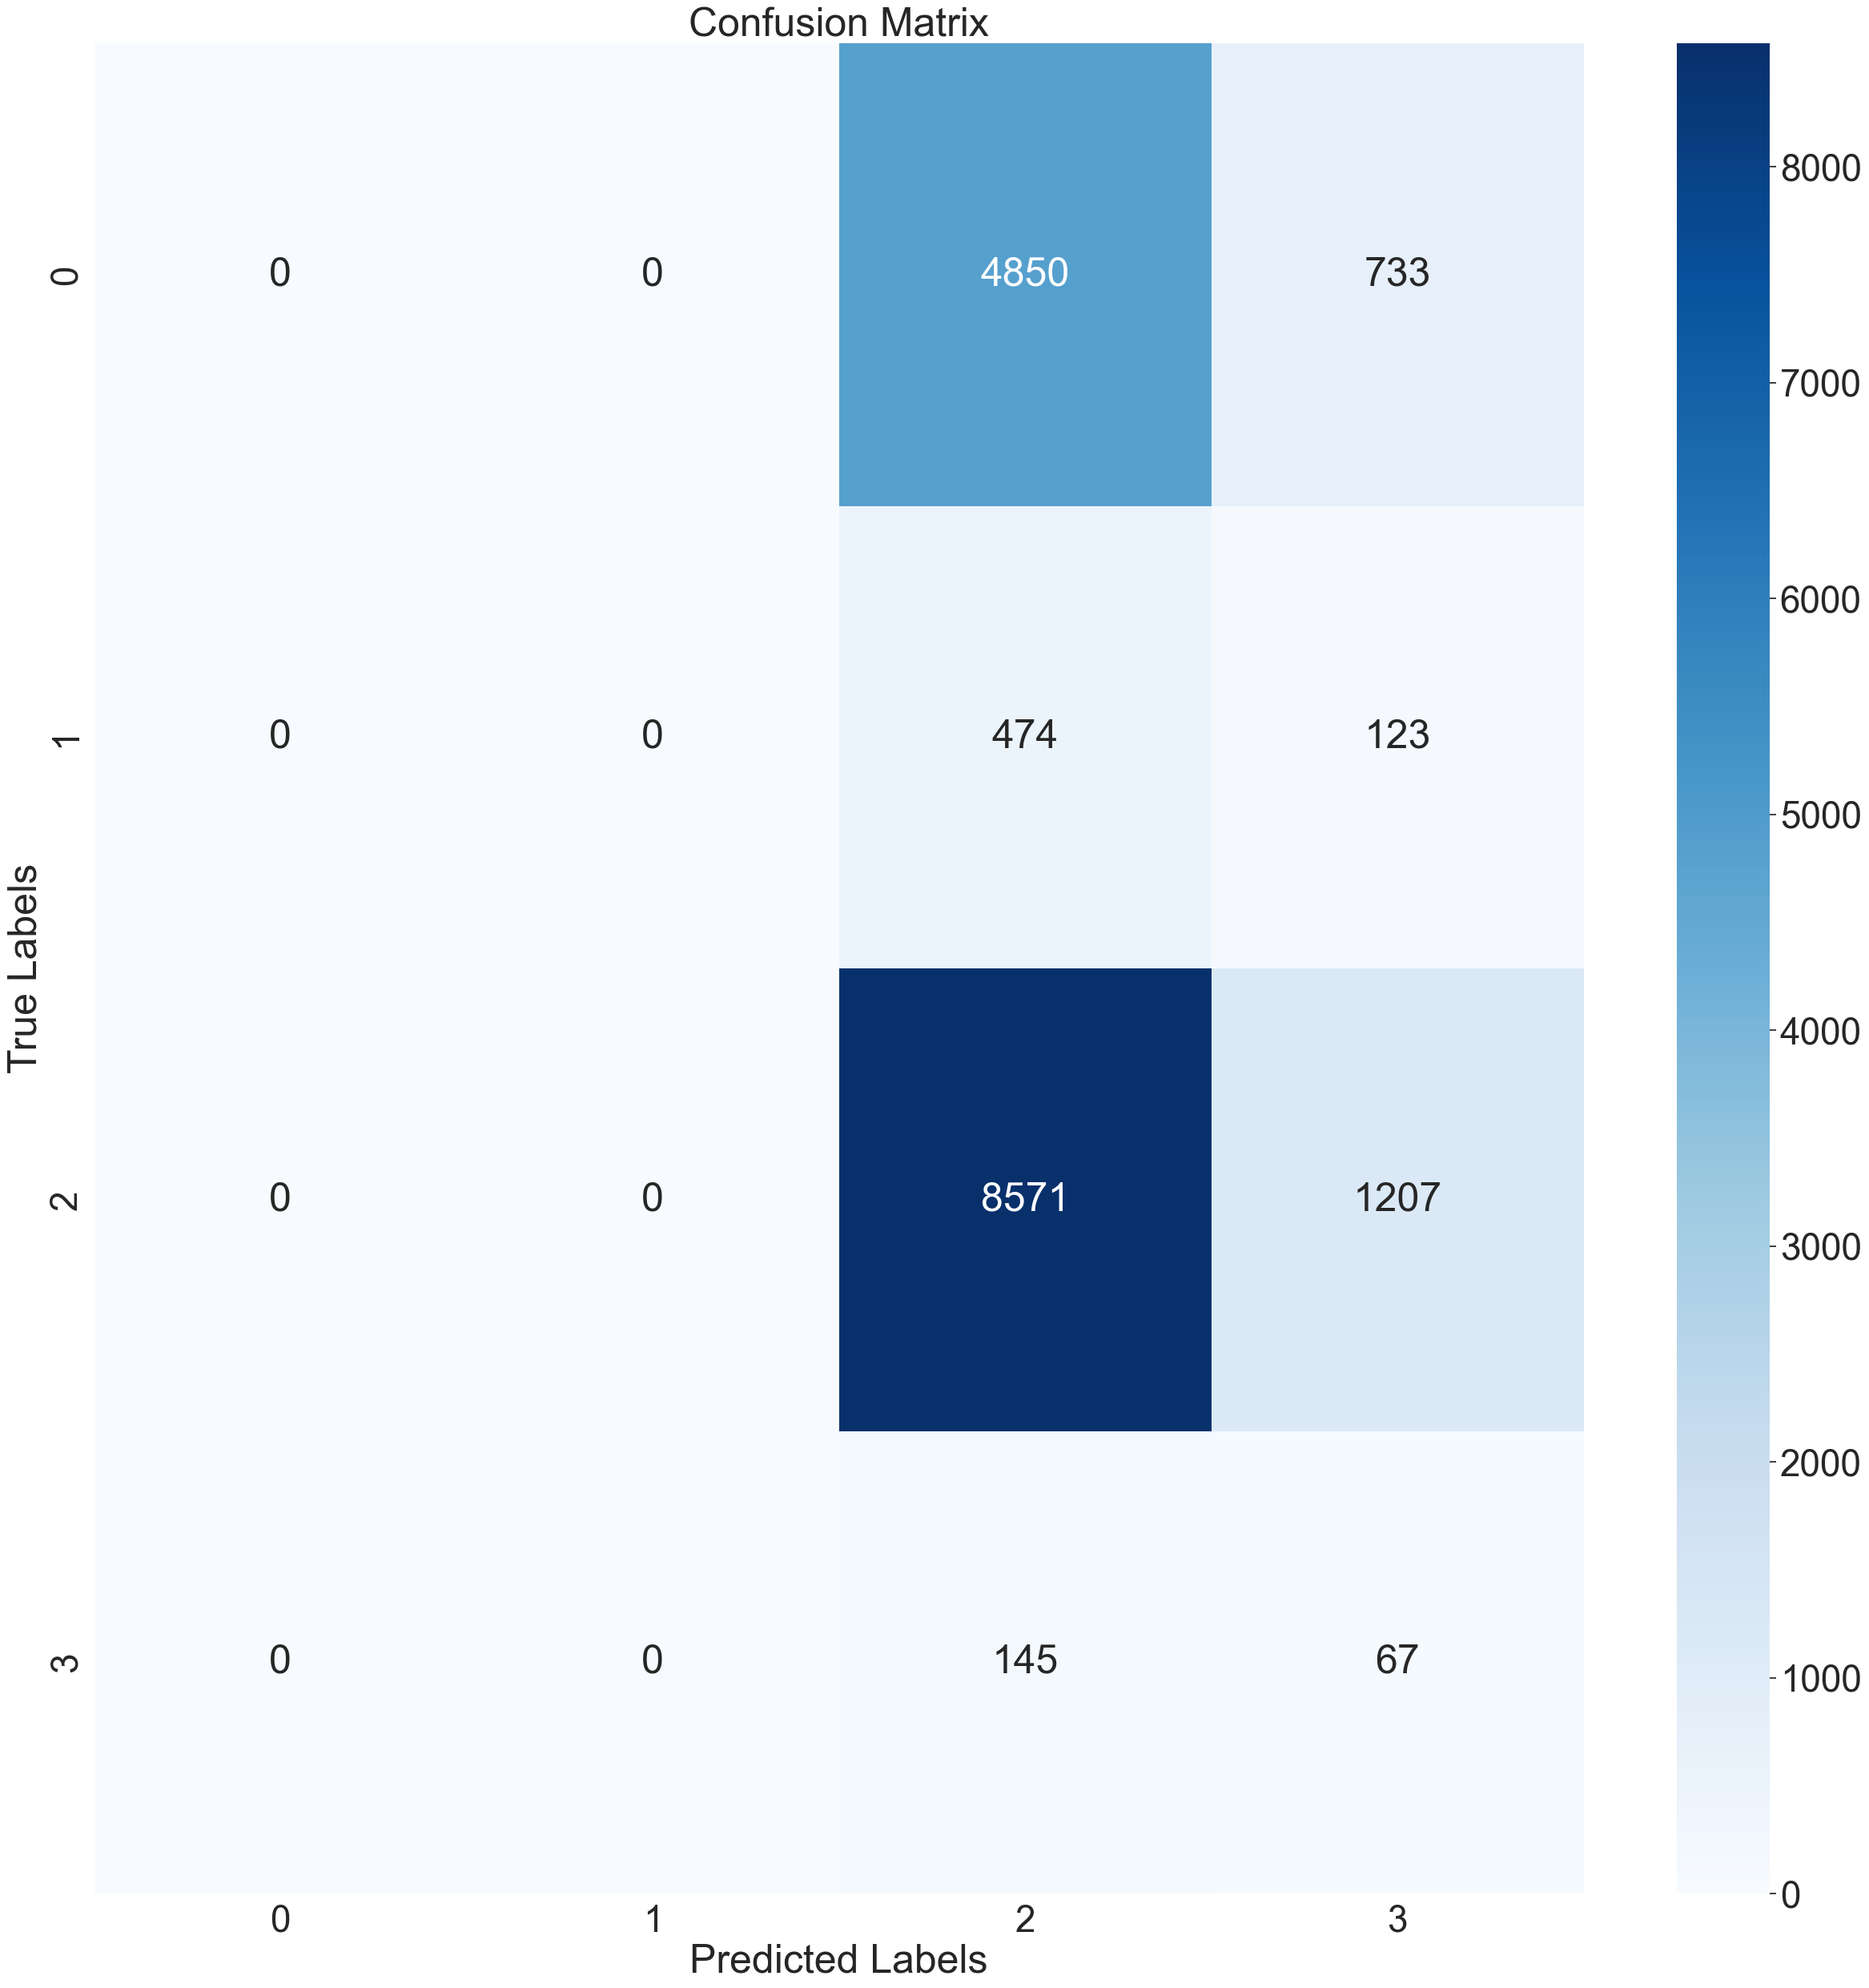

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load your data using PimpMyData
pimp_data = PimpMyData()
df_categoricals = pimp_data.dataframe_generator("data", "categoricals.csv")

# Select relevant columns for analysis
df_chosen_cat = df_categoricals[["type", "district", ]]

# Encode target variable 'type' using LabelEncoder
label_encoder = LabelEncoder()
df_chosen_cat["type"] = label_encoder.fit_transform(df_chosen_cat["type"])
y = df_chosen_cat["type"].values

# Drop the target variable to create the feature matrix
X = df_chosen_cat.drop("type", axis=1)

# Use One Hot encoding for the categorical features 'district'
categorical_features = ['district']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

# Combine One Hot encoded features with other numerical features
X_encoded = preprocessor.fit_transform(X)

# Instantiate the KNeighborsClassifier with k=5 and create the pipeline
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = make_pipeline(StandardScaler(with_mean=False), knn)  # Add with_mean=False here

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(knn_pipeline, X_encoded, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset and evaluate
knn_pipeline.fit(X_encoded, y)
y_pred = knn_pipeline.predict(X_encoded)

# Create a classification report
cls_report = classification_report(y, y_pred)
print("Classification Report:\n", cls_report)

# Create a confusion matrix
cm = confusion_matrix(y, y_pred)

# Visualize the confusion matrix

sns.heatmap(data=cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Interpretation:

    = The model performs poorly for classes 0 and 1, with precision, recall, and F1-score of 0.00. It fails to correctly predict any samples for these classes.
    - The model performs relatively well for class 2, with an F1-score of 0.72. However, it struggles with class 3, with a low F1-score of 0.06.
    - The overall accuracy of the model is 0.53, which is relatively low.
    - It's important to note that the class imbalance (e.g., very few samples for classes 0 and 1) and the model's performance for class 3 suggest that there might be issues with the model or the data. You might want to explore techniques to address class imbalance or consider other model types for better performance.

### DecisionTreeClassifier Classification Model incorporating LabelEncoder, GridSearchCV

C:\Users\dimas\AppData\Local\Temp\ipykernel_17044\1700566431.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chosen_cat["type"] = label_encoder.fit_transform(df_chosen_cat["type"])
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.21675943104514533
Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00        58
          A+       0.00      0.00      0.00         6
         A++       0.00      0.00      0.00         4
           B       0.24      0.49      0.32       597
           C       0.00      0.00      0.00       618
           D       0.21      0.66      0.31       618
           E       0.00      0.00      0.00       619
           F       0.00      0.00      0.00       578
           G       0.00      0.00      0.00       136

    accuracy                           0.22      3234
   macro avg       0.05      0.13      0.07      3234
weighted avg       0.08      0.22      0.12      3234



c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

Text(0.5, 1.0, 'Confusion Matrix')

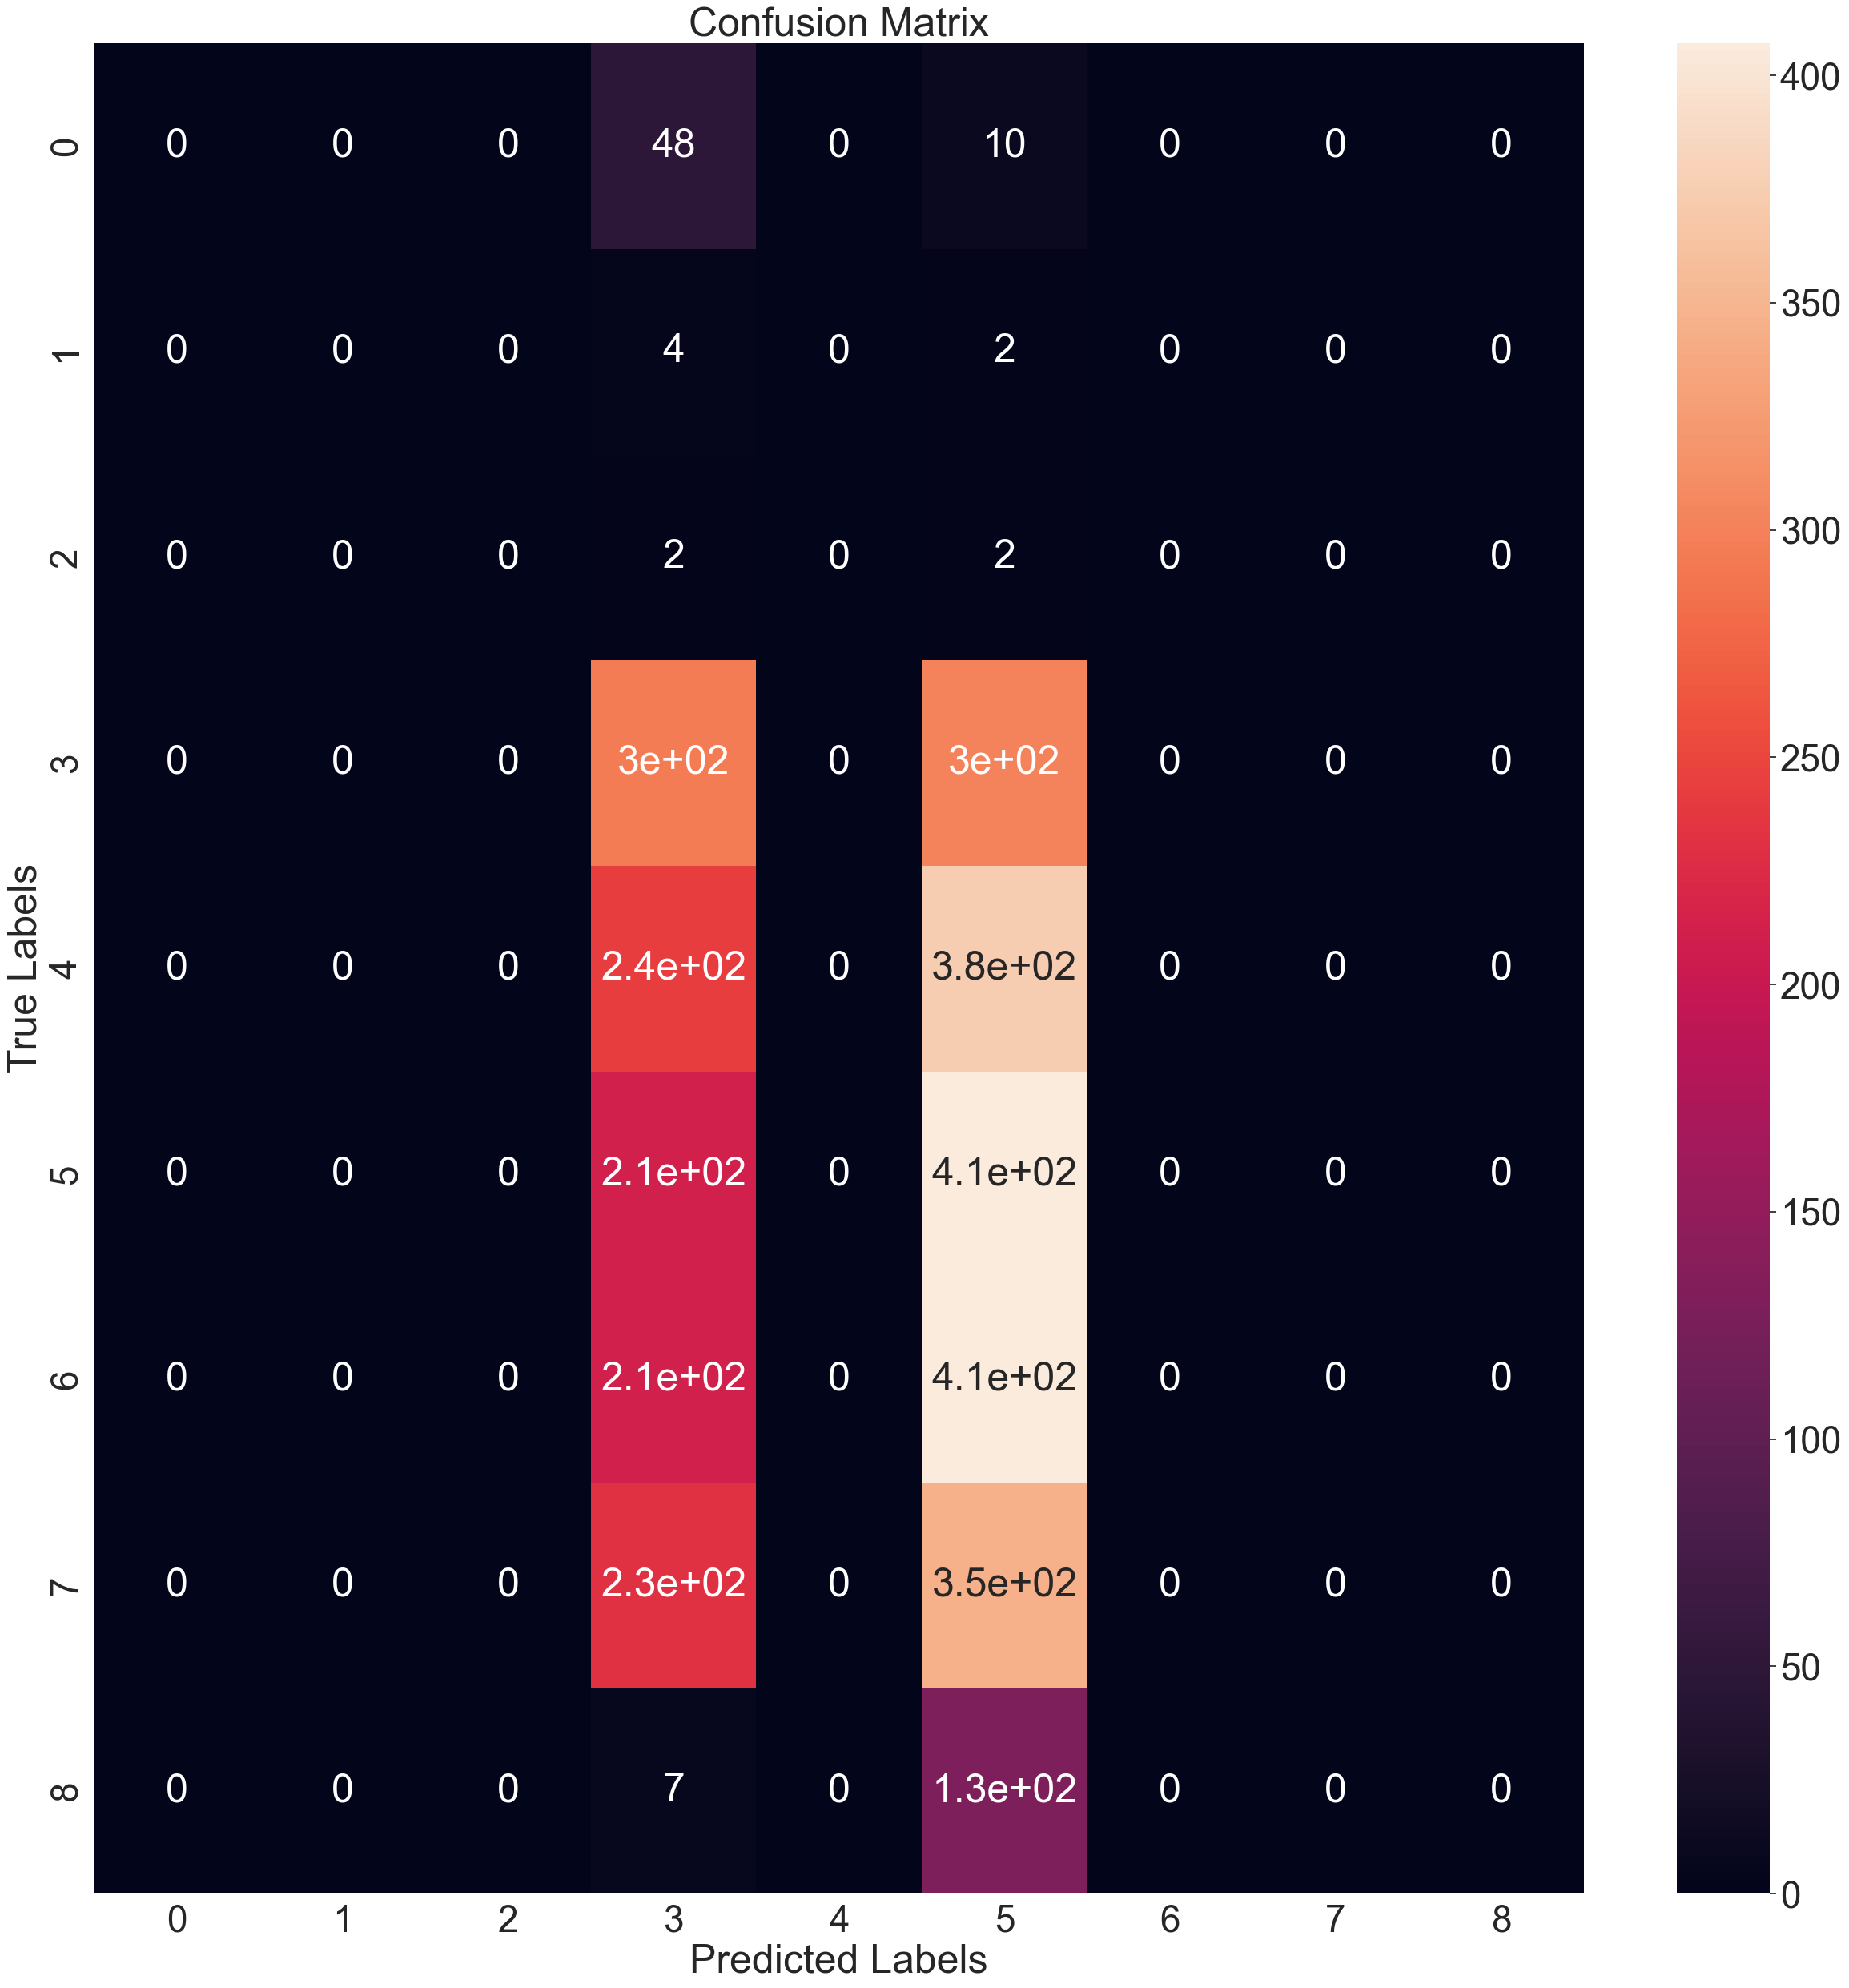

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data using PimpMyData (assuming you have already implemented the dataframe_generator)
pimp_data = PimpMyData()
df_categoricals = pimp_data.dataframe_generator("data", "categoricals.csv")

# Select relevant columns for analysis
df_chosen_cat = df_categoricals[["type", "epc_score"]]

# Encode the categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df_chosen_cat["type"] = label_encoder.fit_transform(df_chosen_cat["type"])

# Assigning X and y
y = df_chosen_cat["epc_score"].values
X = df_chosen_cat.drop("epc_score", axis=1).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Instantiate the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Train the classifier using the best hyperparameters found by GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Test the classifier
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
cls_report = classification_report(y_test, y_pred)
print("Classification Report:\n", cls_report)

# HEATMAP 
sns.heatmap(data=cm, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")


#### Let's Evaluate the Classification Model above

 - Best Hyperparameters:
        These are the hyperparameters that have been determined as the best for the decision tree classifier based on the chosen optimization method. The hyperparameters and their values are as follows:
        . 'criterion': 'gini' - The criterion used to measure the quality of a split. In this case, the Gini impurity is used.
        . 'max_depth': None - The maximum depth of the decision tree is not limited, allowing it to grow as deep as possible.. min_samples_leaf': 1 - The minimum number of samples required to be at a leaf node is set to 1.
        . 'min_samples_split': 2 - The minimum number of samples required to split an internal node is set to 2.
            'splitter': 'best' - The strategy used to choose the split at each node. In this case, the 'best' split strategy is used.


**Accuracy: 0.21675943104514533**
The accuracy of the decision tree classifier on the test dataset is approximately 0.217, indicating that around 21.7% of the predictions made by the model are correct.

**Classification Report**
The classification report provides performance metrics (precision, recall, and F1-score) for each class in the dataset. The classes are represented by labels 'A', 'A+', 'A++', 'B', 'C', 'D', 'E', 'F', and 'G'. Here's what each metric means:

    - Precision: It is the ratio of true positive predictions to the total number of positive predictions (true positive + false positive). It measures how many of the predicted positive cases were actually positive. For example, the precision for class 'B' is 0.24, which means that only 24% of the instances predicted as class 'B' were actually correct.

    - Recall: It is the ratio of true positive predictions to the total number of actual positive instances (true positive + false negative). It measures how many of the positive instances in the dataset were correctly predicted. For example, the recall for class 'D' is 0.66, which means that the model correctly identified 66% of the instances of class 'D'.

Overall, the decision tree classifier is not performing well, as indicated by the low accuracy and F1-scores. There are several possible reasons for this, such as the imbalance in class distribution, the limited number of samples, or the chosen hyperparameters. Further optimization and consideration of the data characteristics may be necessary to improve the model's performance

## SIMPLE LINEAR REGRESSIONS

## PRICE >< PLOT_AREA through linear regression

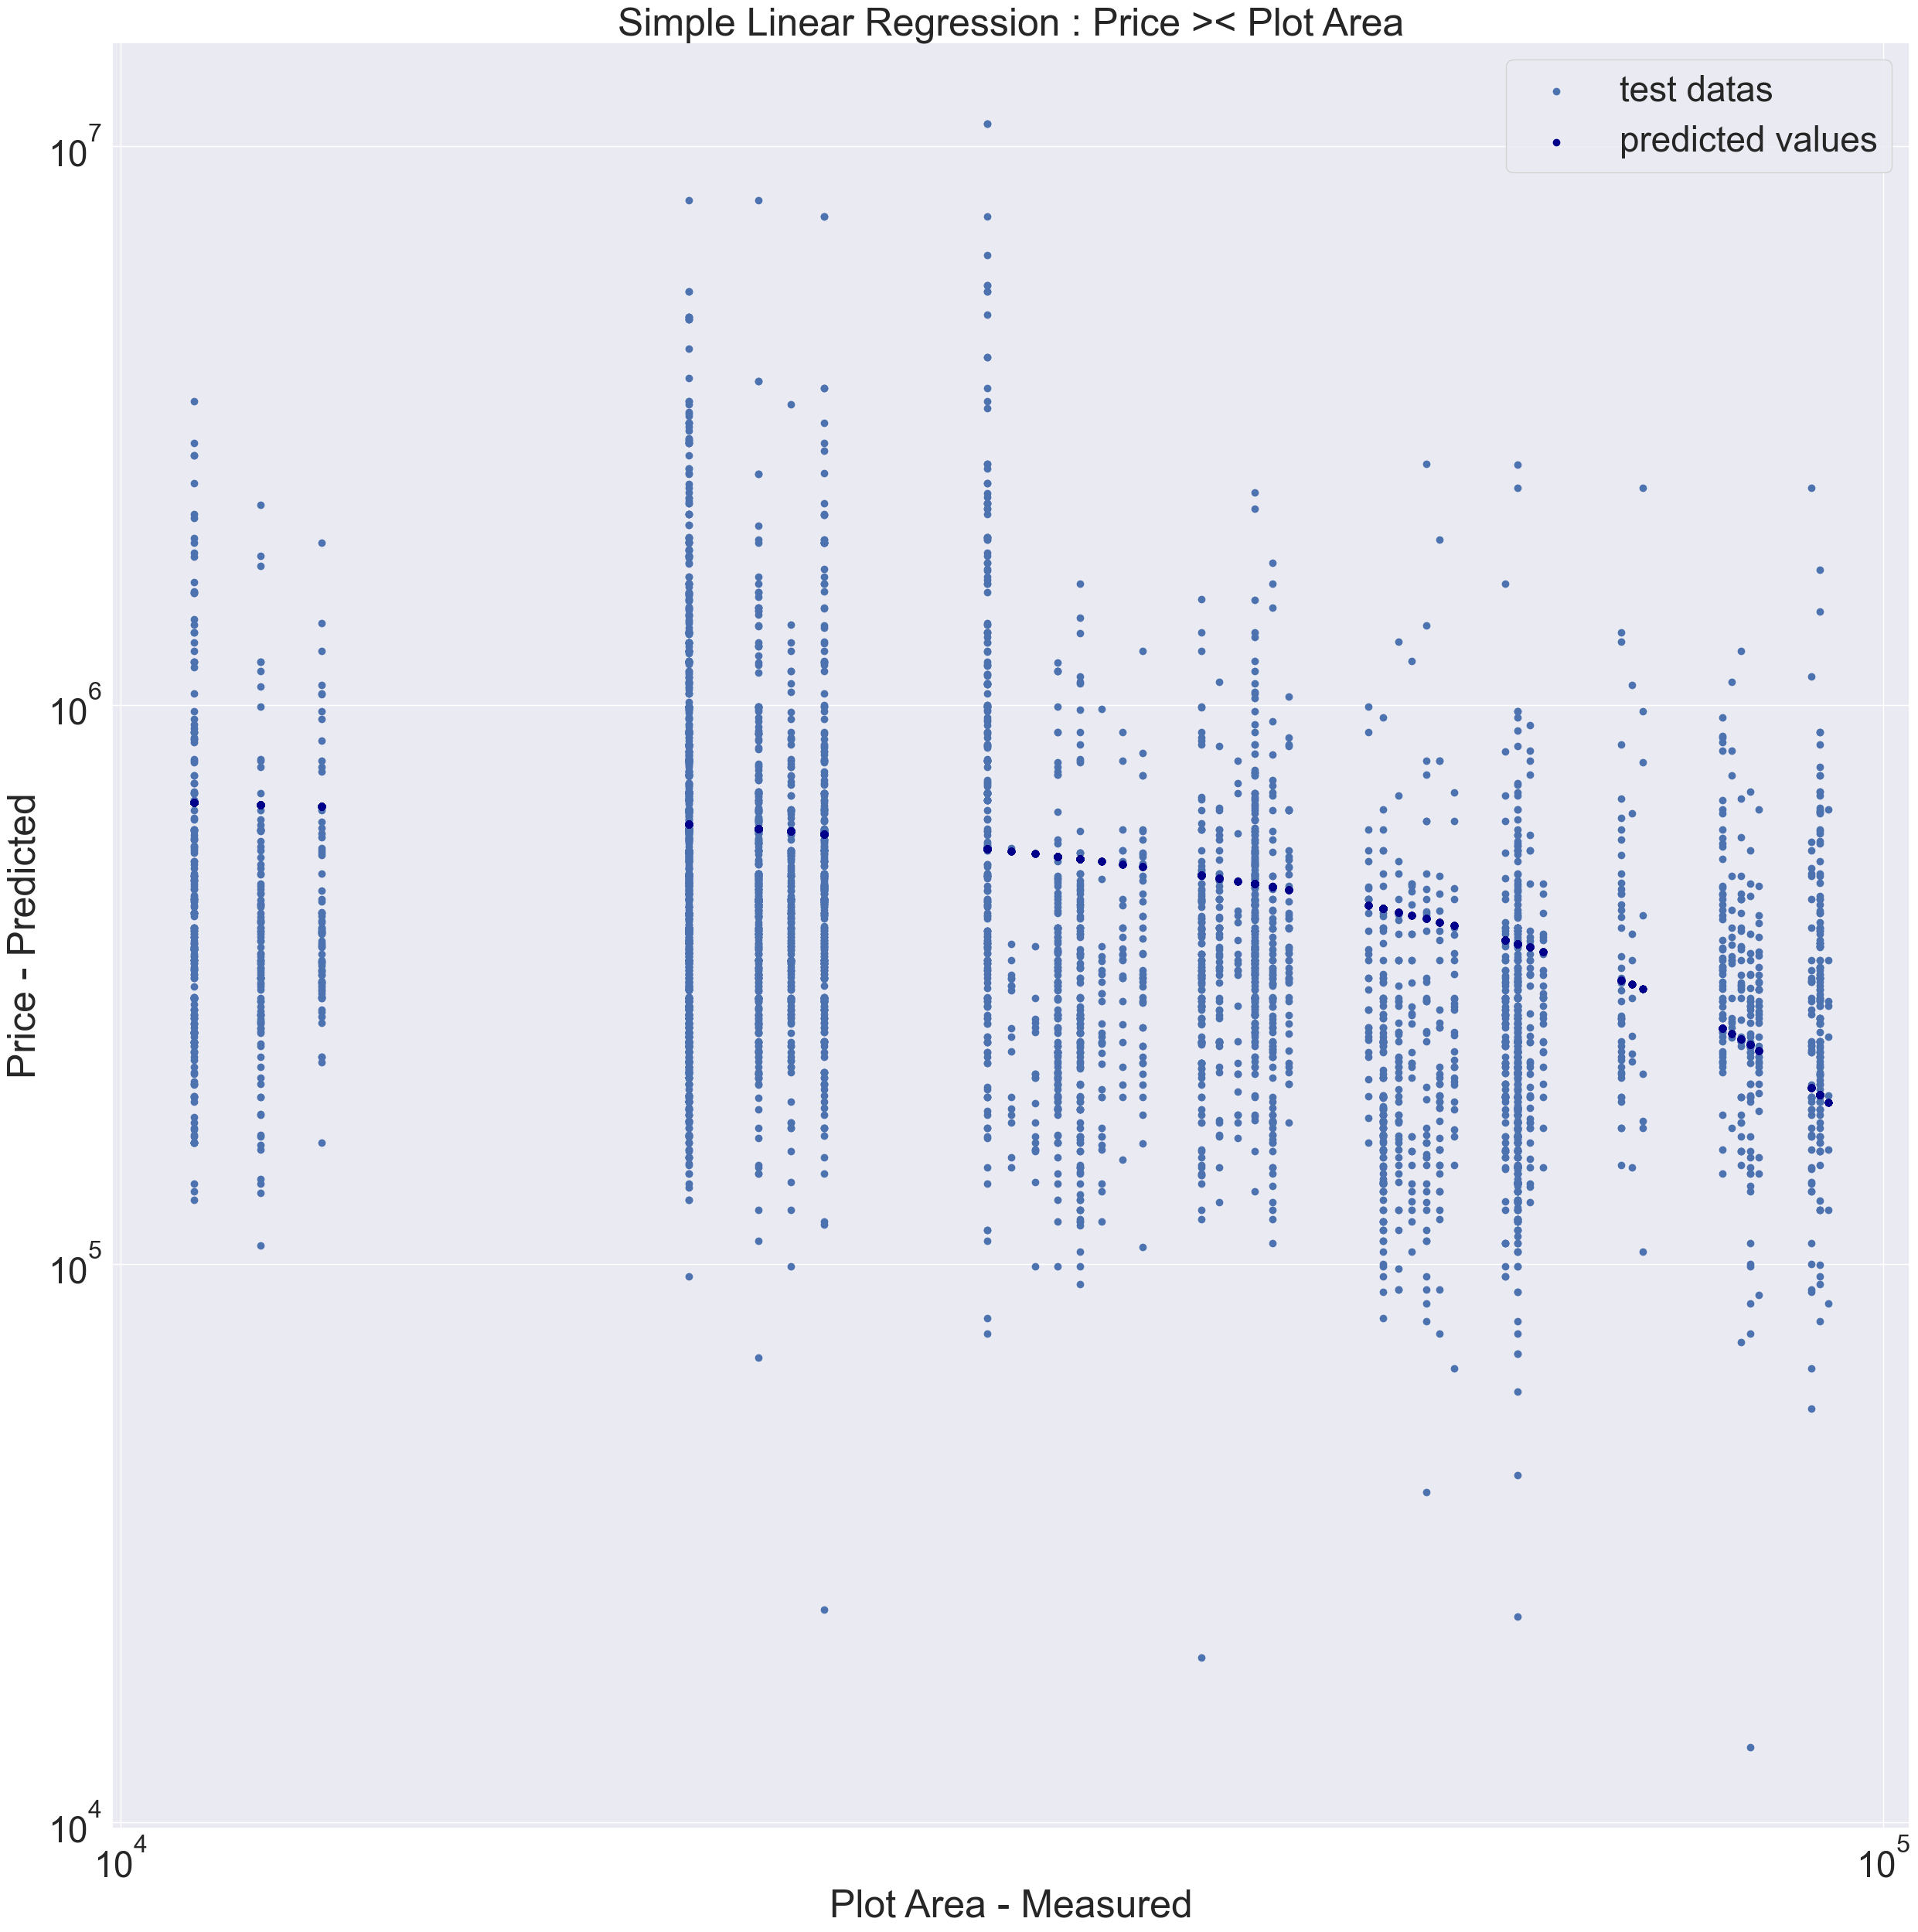

This Linear Regression Model is 4.580327071044687 percent accurate
After passing through 5-fold Cross Validation, this Linear Regression Model is -0.47813096031703356 percent accurate


In [6]:
from sklearn.linear_model import LinearRegression
# Loading data using PimpMyData 
pimp_data = PimpMyData()
dataset_numerical = pimp_data.dataframe_generator("data", "continuous.csv")


# variables to use
X = dataset_numerical.drop("price", axis=1).values
y = dataset_numerical["price"].values

# reshape variables
X_plotarea = X[:,2].reshape(-1,1)
y_true = y.reshape(-1,1)


# TRAINING MODEL

## Split dataset

X_train, X_test, y_train, y_test = train_test_split(X_plotarea, y_true, test_size=0.30, random_state=42)

## fitting training
reg = LinearRegression()
reg.fit(X_train, y_train)

# testing model
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_pred = reg.predict(X_test)

# visualize predictions
plt.scatter(X_test, y_test, label="test datas")
plt.scatter(X_test, y_pred, color="darkblue", label="predicted values")
plt.title("Simple Linear Regression : Price >< Plot Area")
plt.xlabel("Plot Area - Measured")
plt.ylabel("Price - Predicted")
plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()

# EVALUATION
r_squared_score = reg.score(X_test, y_test)
print(f"This Linear Regression Model is {r_squared_score*100} percent accurate")

## N-fold Cross-Validation
cv_fold = 5
cv_result_mean = np.mean(cross_val_score(reg, X_plotarea, y_true, cv=cv_fold))
print(f"After passing through {cv_fold}-fold Cross Validation, this Linear Regression Model is {cv_result_mean*100} percent accurate")

## PRICE >< PLOT_AREA THROUGH CROSS-VALIDATED SIMPLE LINEAR REGRESSION


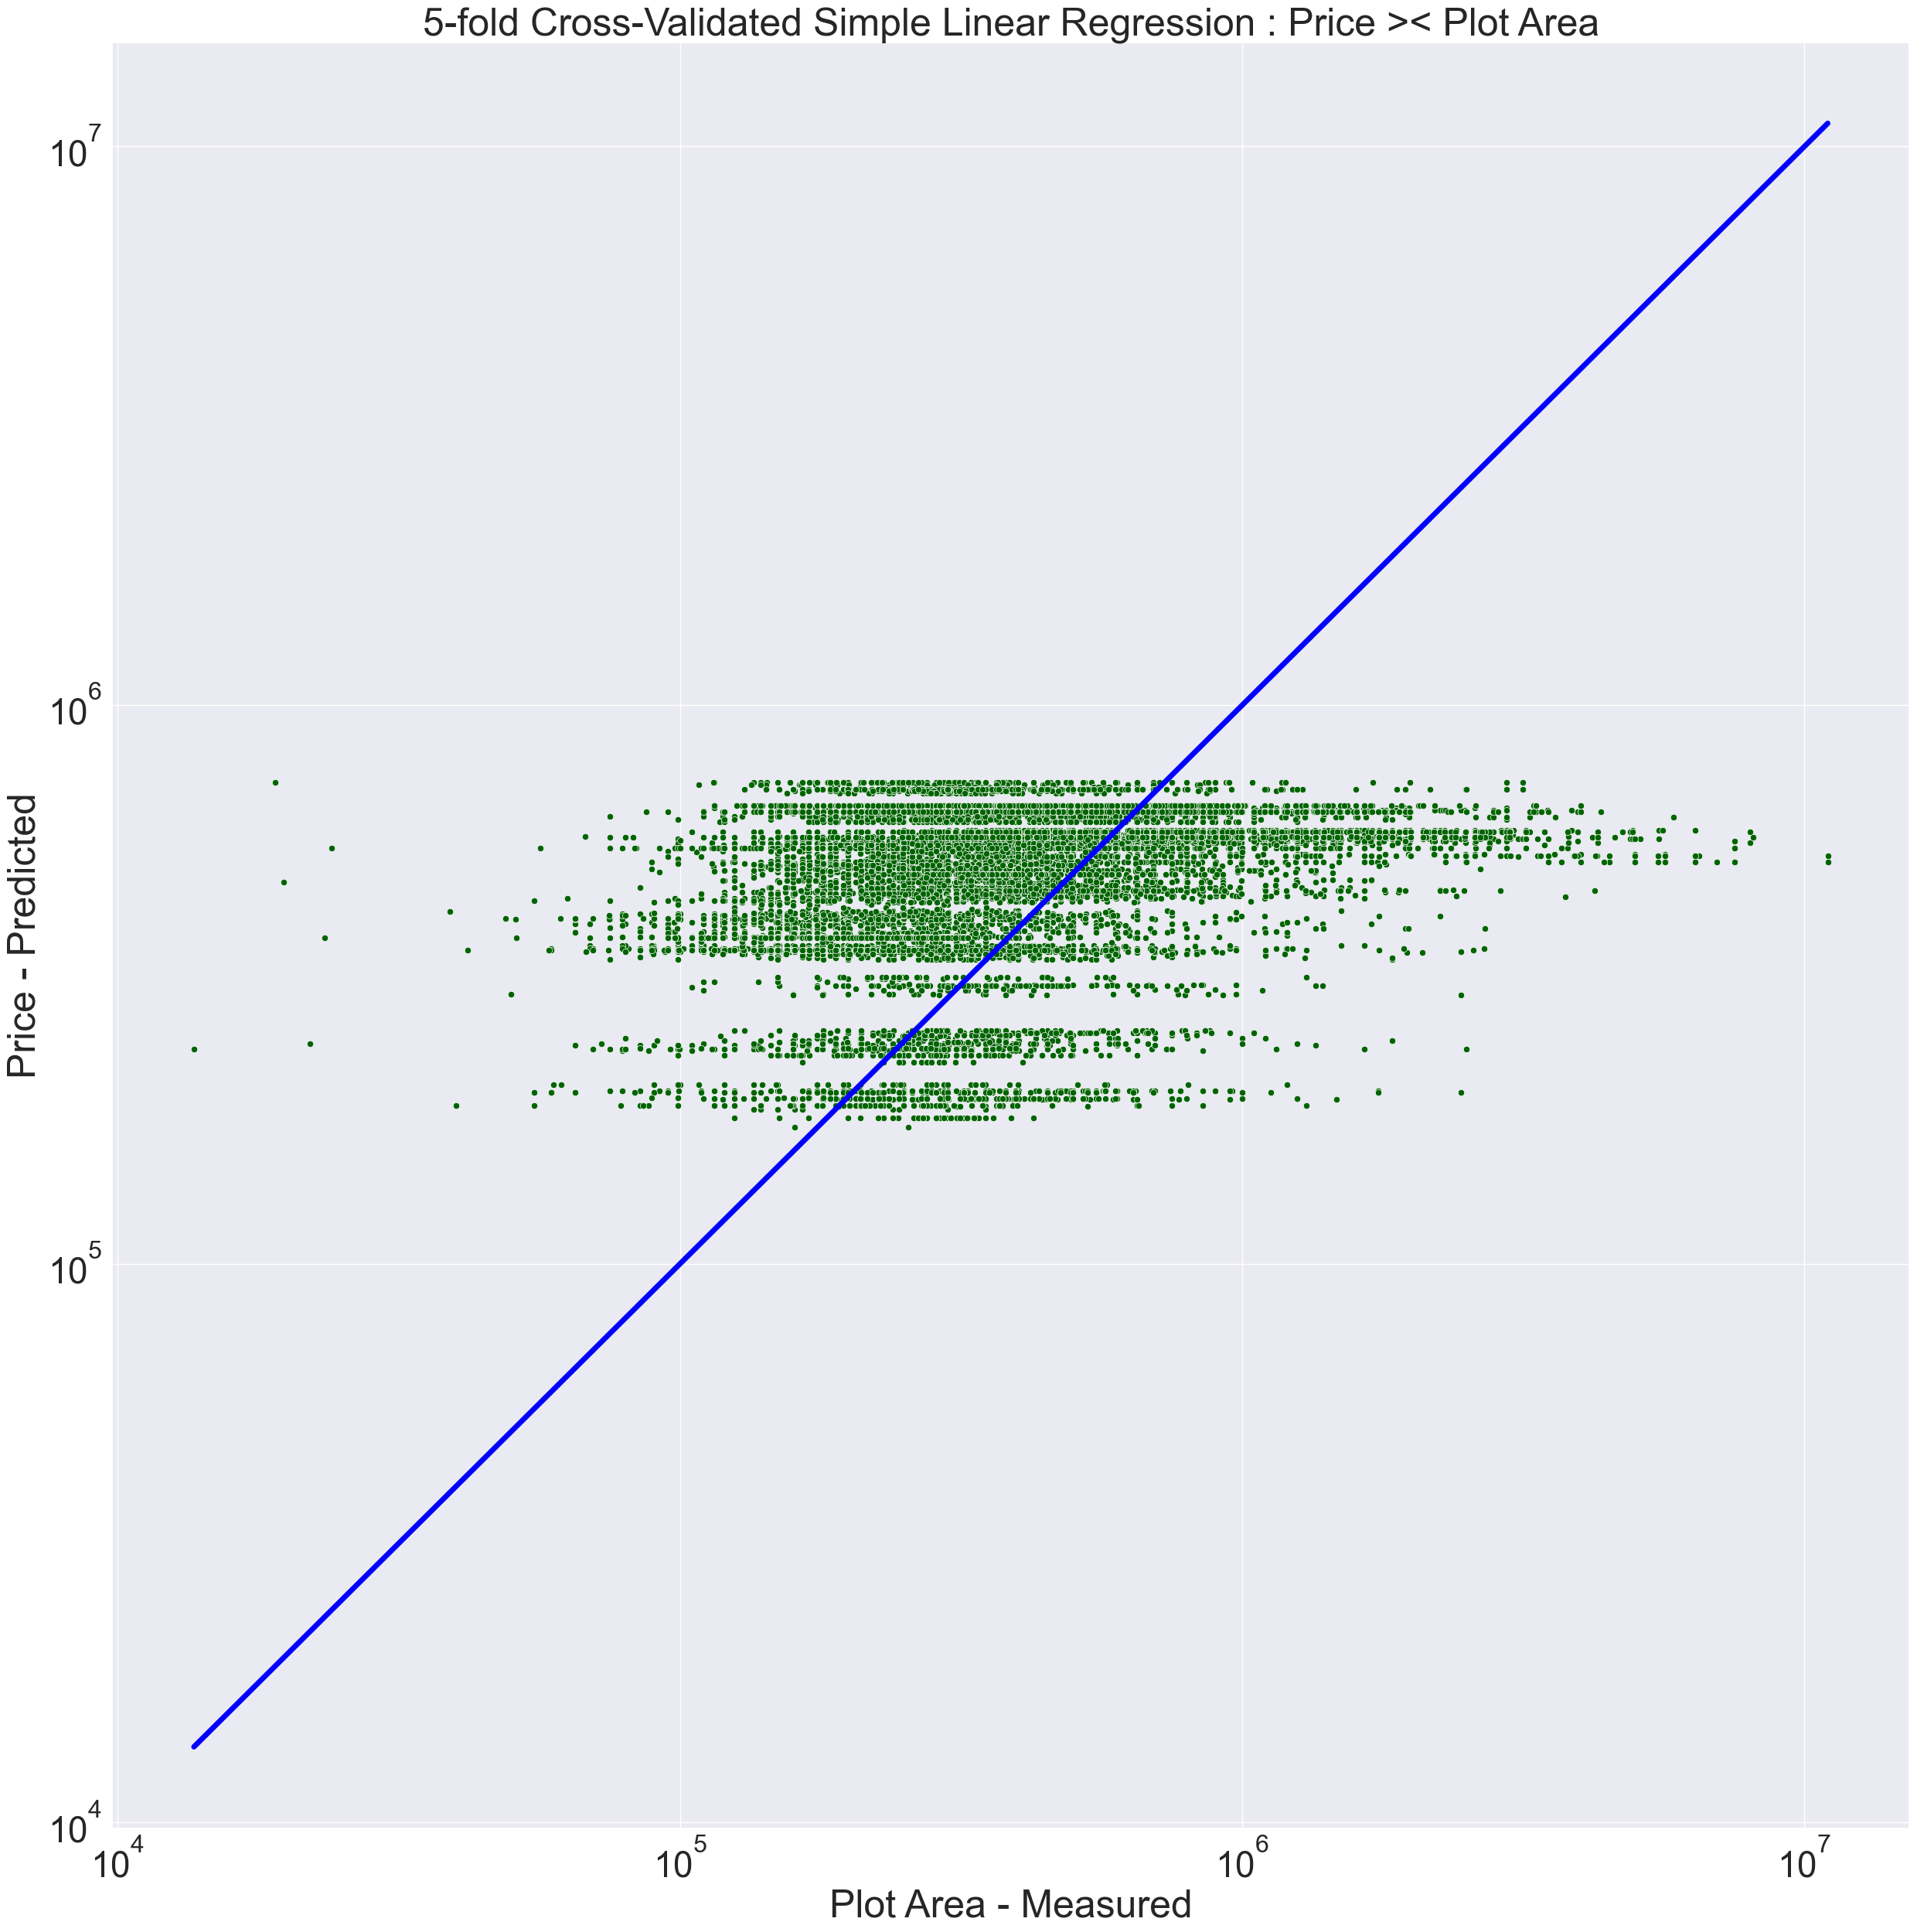

This 5-fold Cross-Validated Simple Linear Regression is 4.580327071044687 percent accurate


In [7]:
from sklearn.model_selection import cross_val_predict
pimp_data = PimpMyData()
dataset_numerical = pimp_data.dataframe_generator("data", "continuous.csv")

# variables to use
X = dataset_numerical.drop("price", axis=1).values
y = dataset_numerical["price"].values

# reshape variables
X_plotarea = X[:,2].reshape(-1,1)
y_true = y.reshape(-1,1)


reg_lr = LinearRegression()

cv_fold = 5

# Cross-Validated Prediction
cv_y_pred = cross_val_predict(reg_lr, X_plotarea, y_true, cv=cv_fold)

# visualise the prediction
sns.scatterplot(x=y_true.flatten(), y=cv_y_pred.flatten(), color="darkgreen")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color="blue", lw=5)
plt.title(f"{cv_fold}-fold Cross-Validated Simple Linear Regression : Price >< Plot Area")
plt.xlabel("Plot Area - Measured")
plt.ylabel("Price - Predicted")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Evaluation
cv_score_mean = np.mean(cross_val_score(reg_lr, X_plotarea, y_true, cv=cv_fold))
print(f"This {cv_fold}-fold Cross-Validated Simple Linear Regression is {r_squared_score*100} percent accurate")

## PRICE >< PLOT_AREA THROUGH CROSS-VALIDATED RIDGE REGRESSION (RIDGECV)

Best alpha: 10.0
Ridge score: 0.045799559134604095


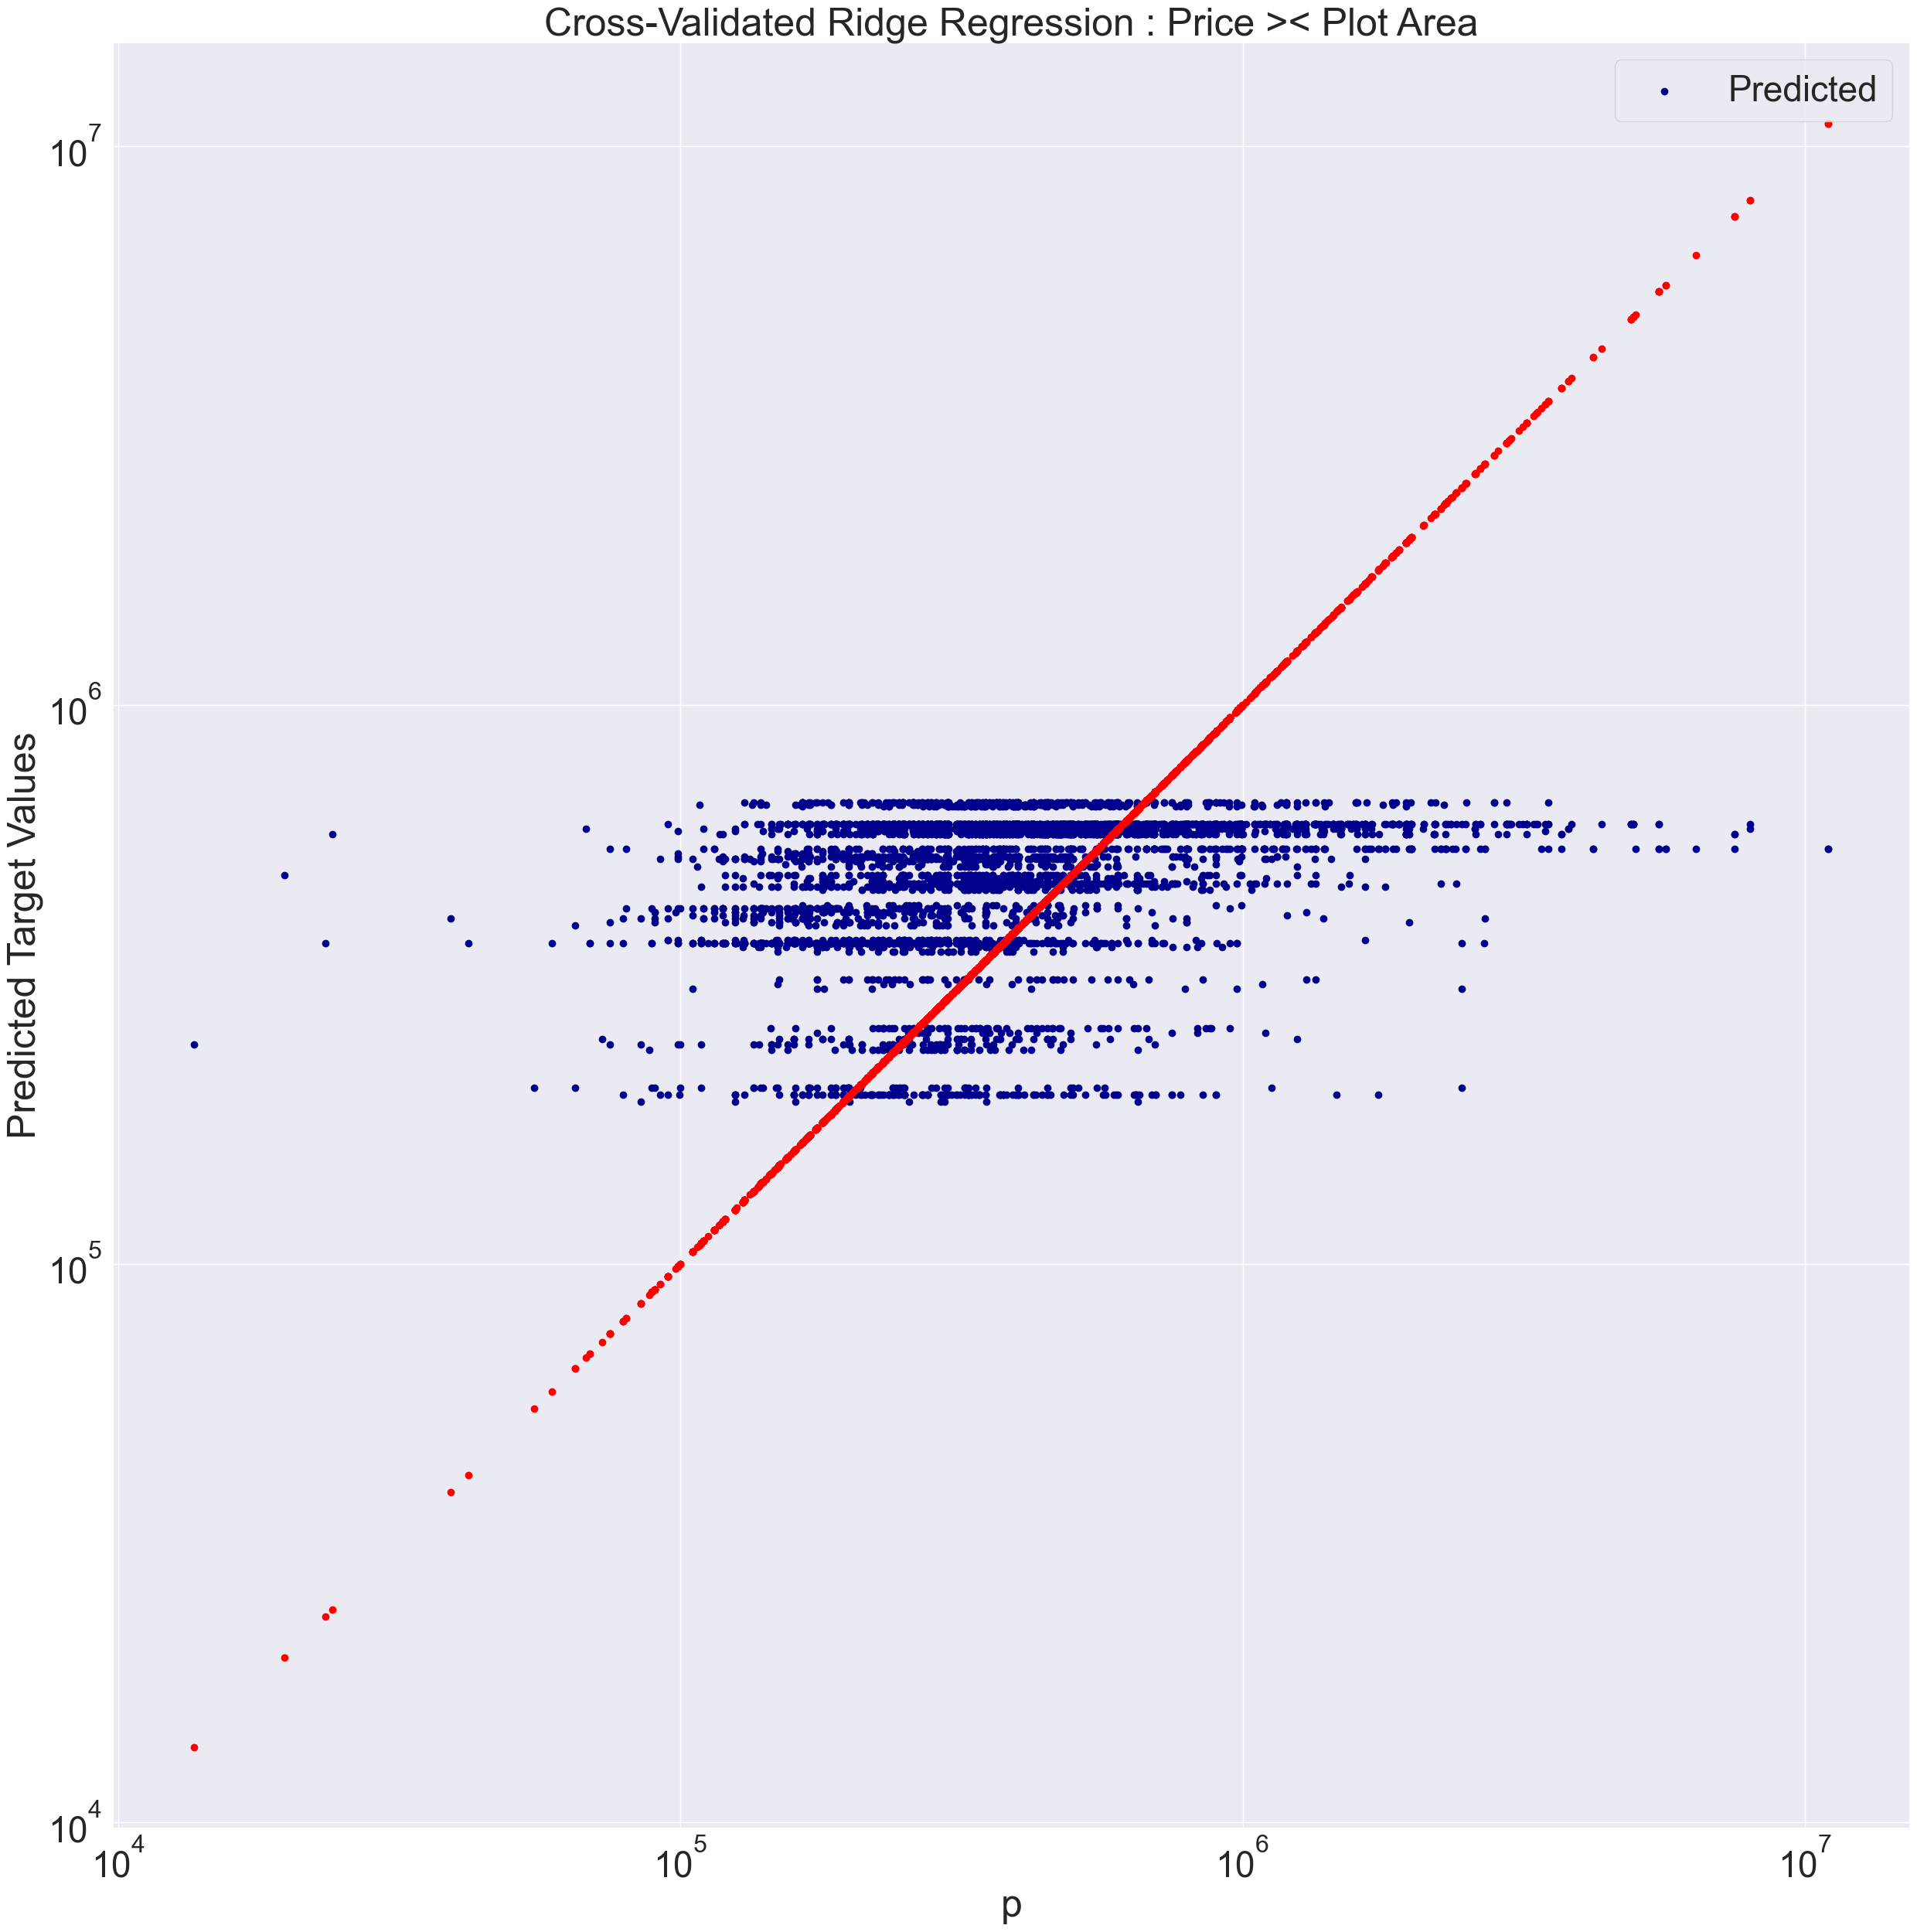

In [8]:
# Create the pipeline with the StandardScaler and RidgeCV
from sklearn.linear_model import RidgeCV

pimp_data = PimpMyData()
dataset_numerical = pimp_data.dataframe_generator("data", "continuous.csv")
cv_fold = 6
ridge_pipeline = make_pipeline(
    StandardScaler(),                   # Normalize the data
    RidgeCV(alphas=[0.1, 1.0, 10.0], cv=cv_fold)   # Perform cross-validated ridge regression
)

# Fit the pipeline to the training data
ridge_pipeline.fit(X_train, y_train)

# Predict on the test data
ridged_y_pred = ridge_pipeline.predict(X_test)

# Get the best alpha value from the cross-validation
best_alpha = ridge_pipeline.named_steps['ridgecv'].alpha_

# Get the score of the best ridge model
ridged_score = ridge_pipeline.score(X_test, y_test)

print(f"Best alpha: {best_alpha}")
print(f"Ridge score: {ridged_score}")


# VISUALIZE PREDICTION

plt.scatter(y_test, ridged_y_pred, color='darkblue', label='Predicted')
plt.scatter(y_test, y_test, color='red')  # Diagonal line (perfect prediction)
plt.xlabel('p')
plt.ylabel('Predicted Target Values')
plt.title('Cross-Validated Ridge Regression : Price >< Plot Area')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()



## PRICE >< PLOT_AREA THROUGH HUBERREGRESSOR

c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dimas\Desktop\BECODE\PROJECTS\Project_MLDeployment_ImmoEliza\virtualenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dimas\Desktop\BECODE\PROJ

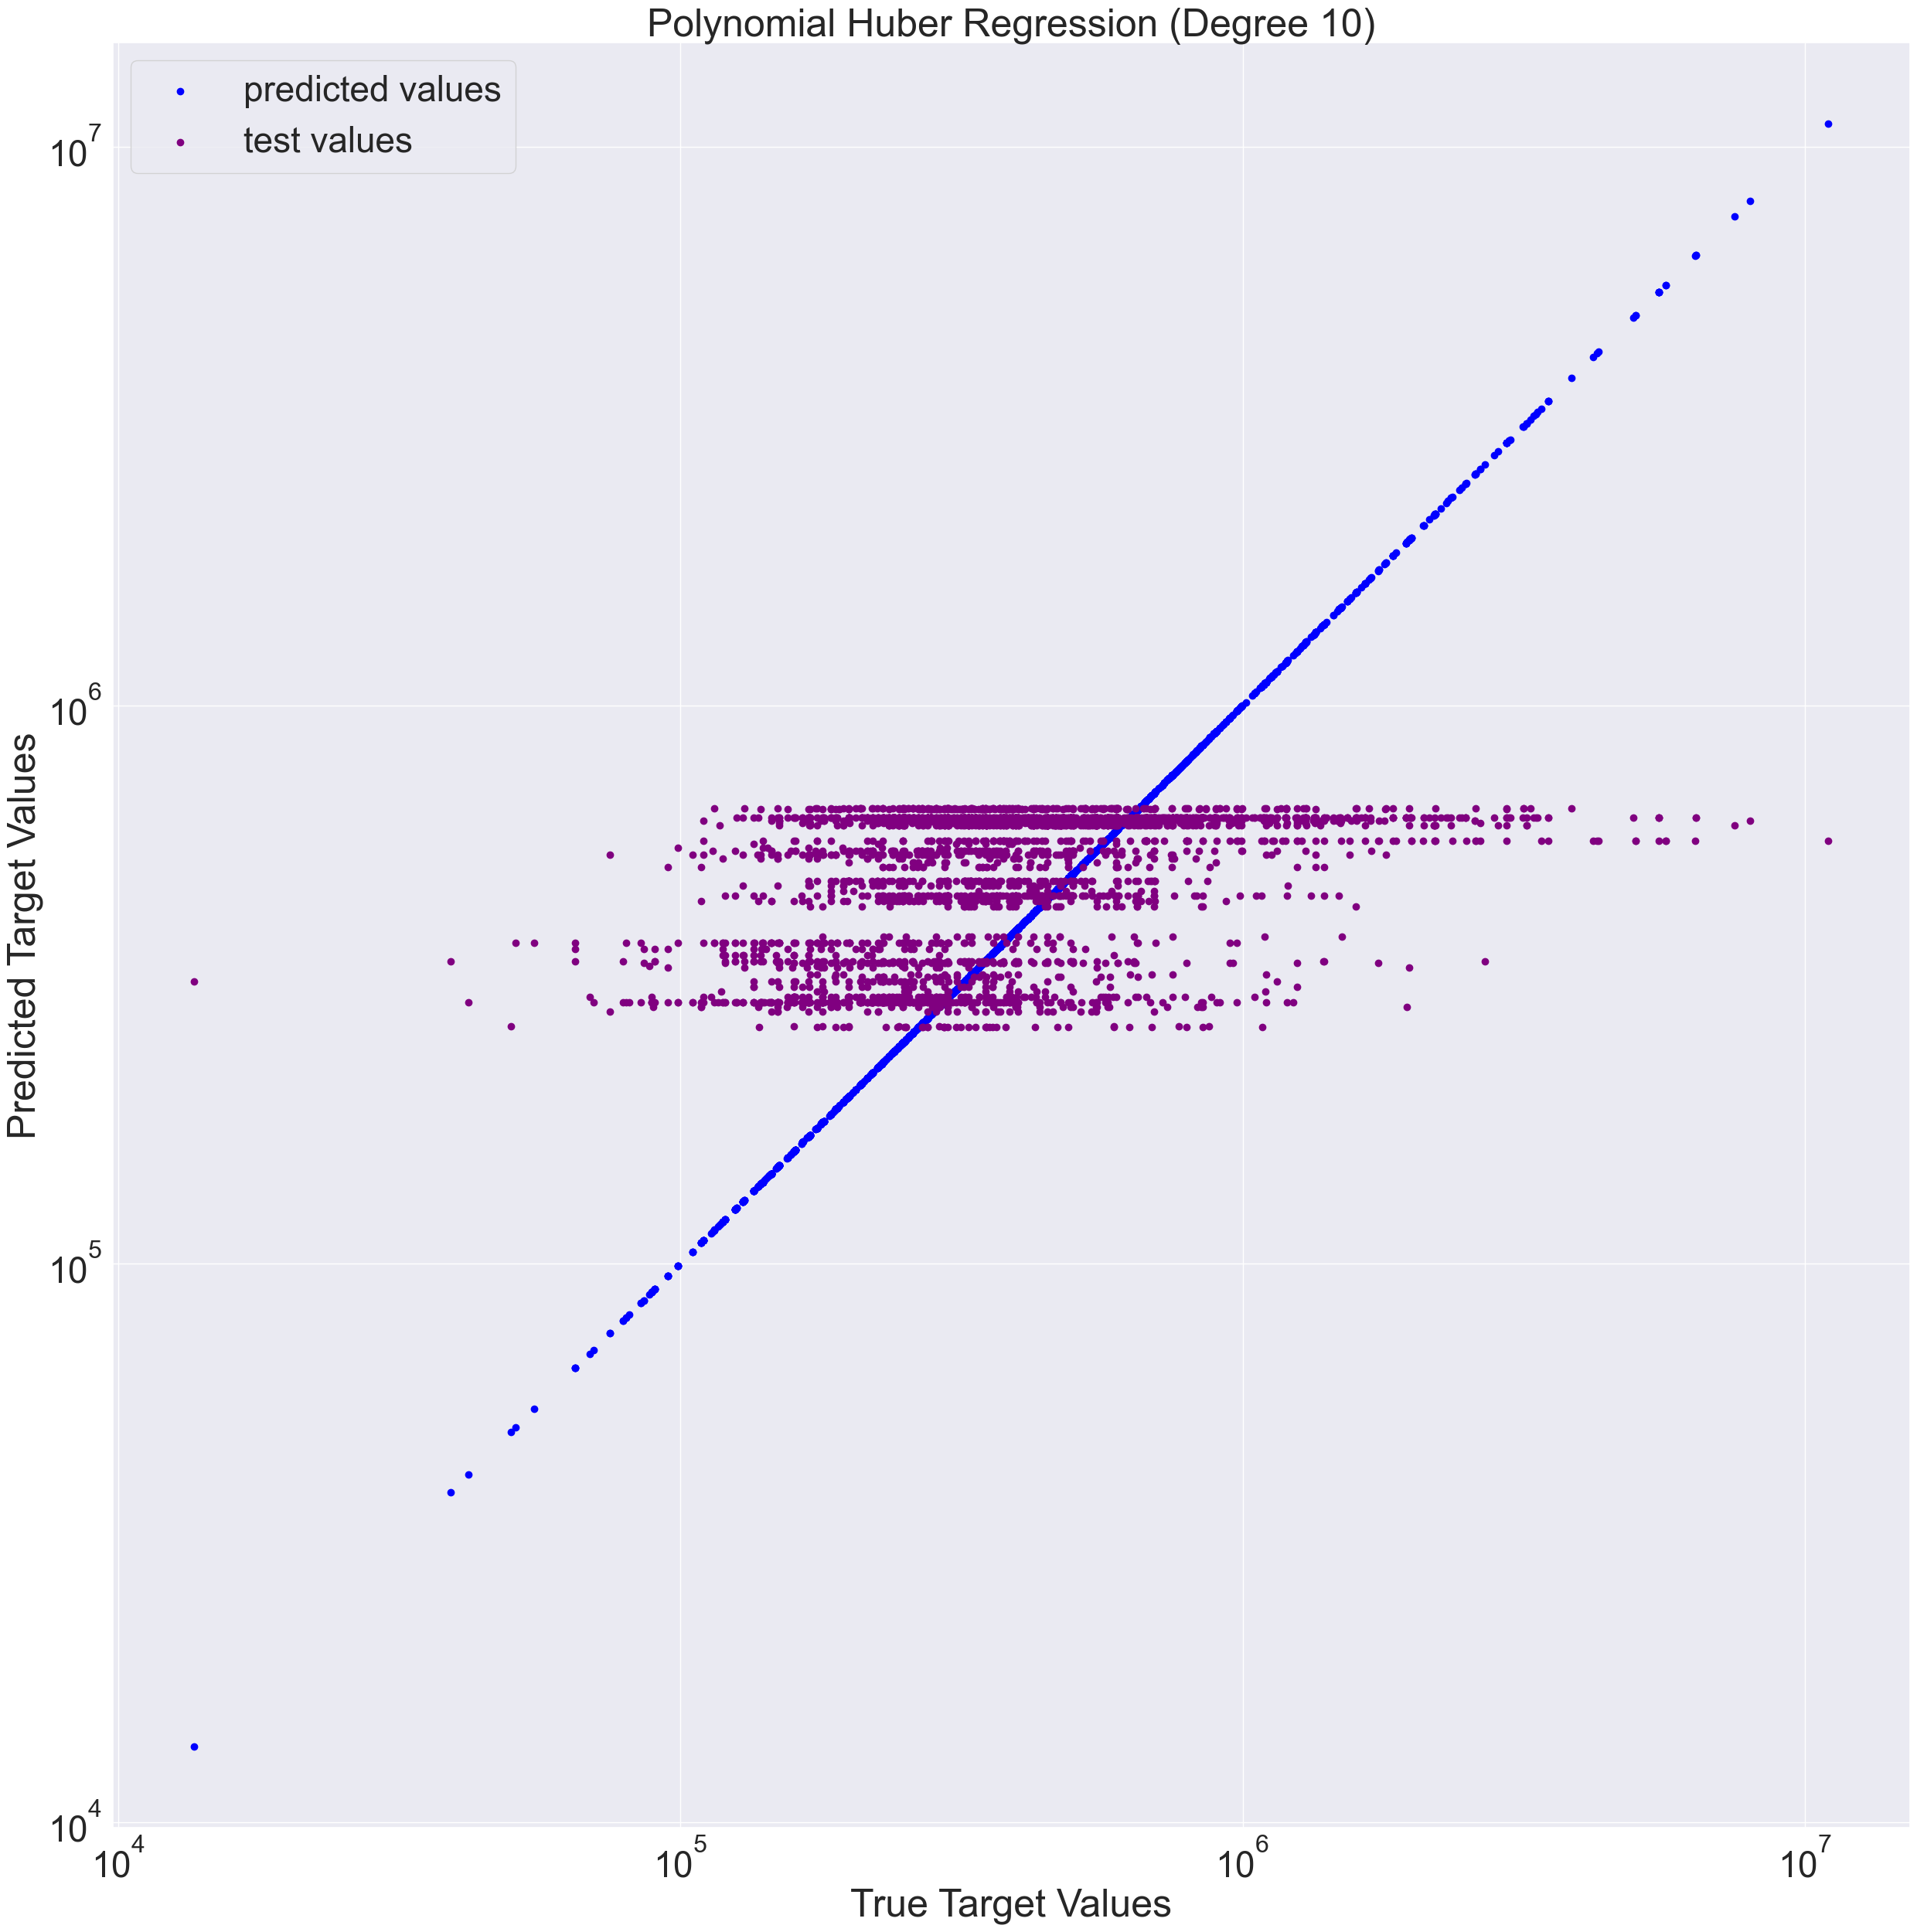

Cross-Validated Huber Regression R^2 Scores: [0.06041053 0.06570748 0.06229341 0.06391778 0.05302957]
Mean R^2 Score: 0.06 +/- 0.00


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

# Variables to use
X = dataset_numerical.drop("price", axis=1).values
y = dataset_numerical["price"].values

# Reshape variables
X_plotarea = X[:, 2].reshape(-1, 1)
y_true = y.reshape(-1, 1)

# Specify degree of 2 for polynomial regression model
degree = 10

# Create a pipeline with PolynomialFeatures, StandardScaler, and HuberRegressor
poly_huber_pipeline = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    HuberRegressor(epsilon=10.5)
)

# Split the variables
X_train, X_test, y_train, y_test = train_test_split(X_plotarea, y_true, test_size=0.20, random_state=30000, shuffle=True)

# Perform cross-validated Huber regression with polynomial features
cv_fold = 5
cv_scores = cross_val_score(poly_huber_pipeline, X_train, y_train, cv=cv_fold, scoring='r2')

# Fit poly_huber_pipeline
poly_huber_pipeline.fit(X_train, y_train)

# Determine y_pred
y_pred = poly_huber_pipeline.predict(X_test)

# Visualize predictions

plt.scatter(y_test, y_test, color='blue', label="predicted values")  # Diagonal line (perfect prediction)
plt.scatter(y_test, y_pred, color = "purple", label="test values")
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title(f'Polynomial Huber Regression (Degree {degree})')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

# Calculate mean and standard deviation of cross-validated scores
cv_mean_score = np.mean(cv_scores)
cv_std_score = np.std(cv_scores)

print(f"Cross-Validated Huber Regression R^2 Scores: {cv_scores}")
print(f"Mean R^2 Score: {cv_mean_score:.2f} +/- {cv_std_score:.2f}")


## PRICE >< PLOT_AREA THROUGH N-DEGREE POLYNOMIAL REGRESSION

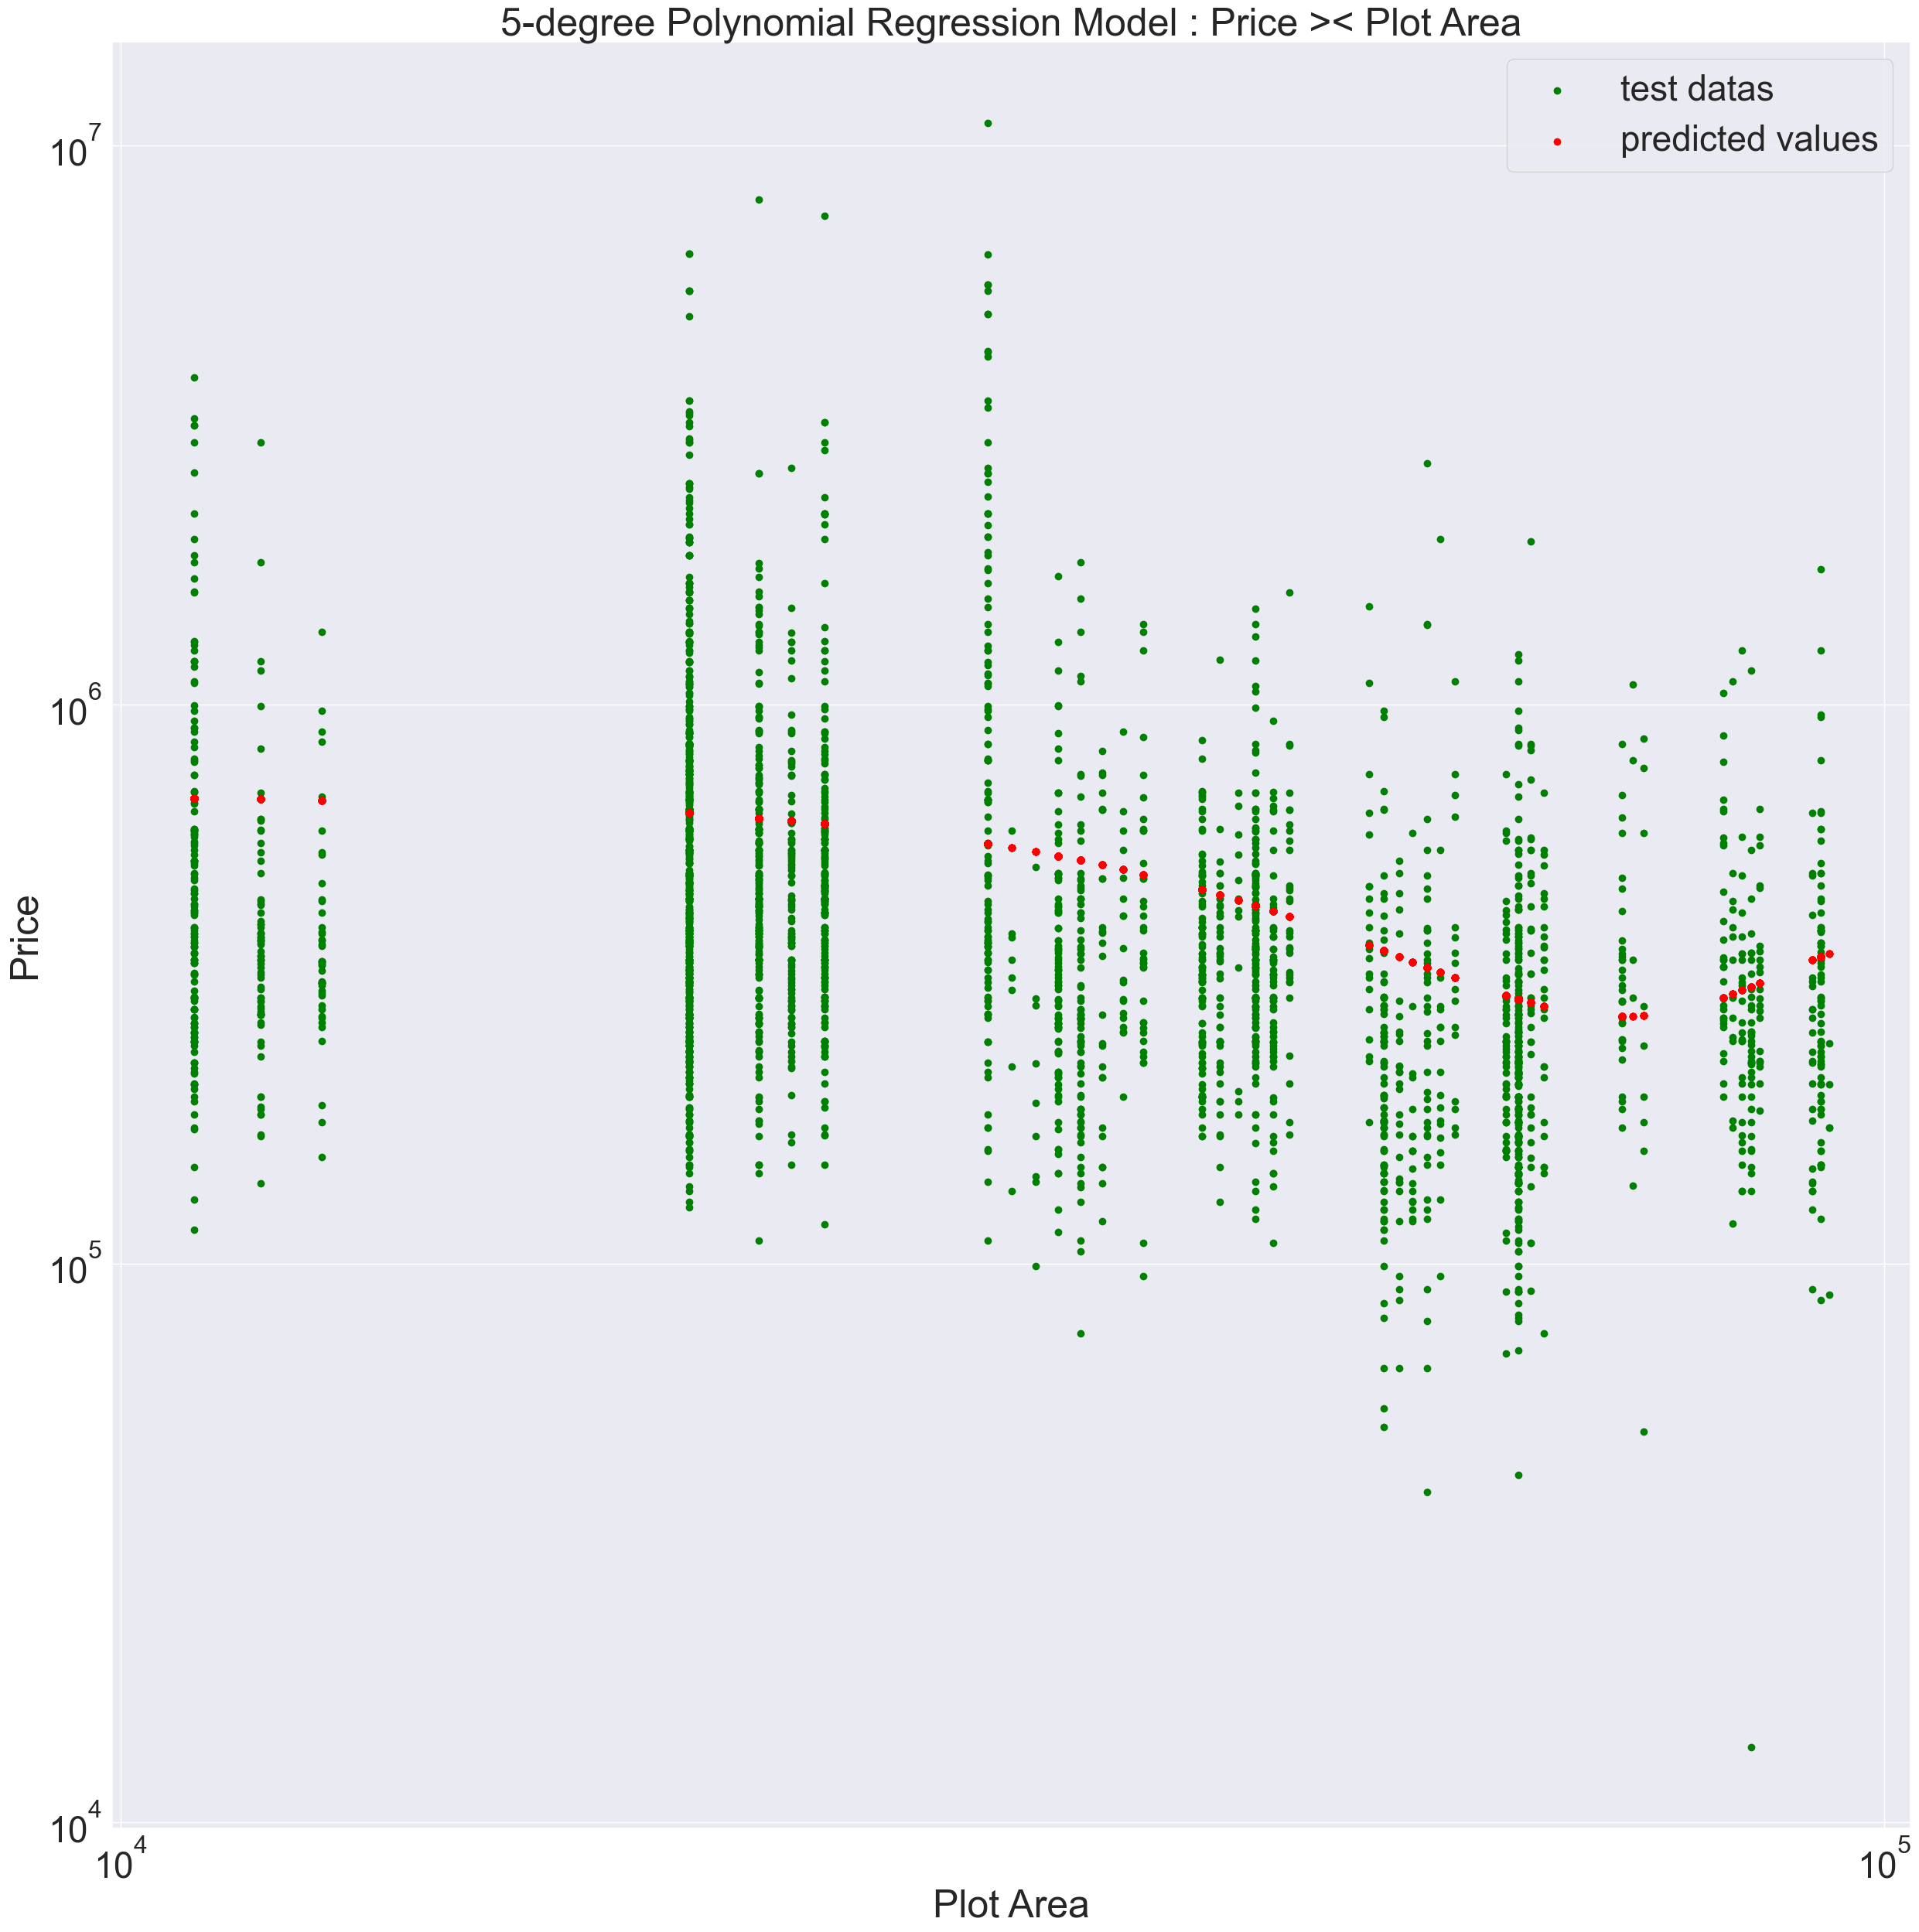

This 5-degree Polynomial Regression Model degree is 5.8095818990103965 percent accurate


In [10]:

# variables to use
X = dataset_numerical.drop("price", axis=1).values
y = dataset_numerical["price"].values

# reshape variables
X_plotarea = X[:,2].reshape(-1,1)
y_true = y.reshape(-1,1)

# specify degree of 2 for polynomial regression model
degree = 5
poly_pipeline = make_pipeline(PolynomialFeatures(
                    degree=degree, 
                    include_bias=False),
                    LinearRegression()) 

# split the variable
X_train, X_test, y_train, y_test = train_test_split(X_plotarea, y_true, test_size=0.20, random_state=30000, shuffle=True)

# fit poly_pipeline
poly_pipeline.fit(X_train, y_train)

# determine y_pred
y_pred = poly_pipeline.predict(X_test)

# visualize predictions
plt.scatter(X_test, y_test, color='green', label='test datas')
plt.scatter(X_test, y_pred, color="red", label="predicted values")
plt.title(f"{degree}-degree Polynomial Regression Model : Price >< Plot Area")
plt.xlabel("Plot Area")
plt.ylabel("Price")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

r_squared_score = poly_pipeline.score(X_test, y_test)
print(f"This {degree}-degree Polynomial Regression Model degree is {r_squared_score*100} percent accurate")



## PRICE >< PLOT_AREA THROUGH N-DEGREE CROSS-VALIDATED POLYNOMIAL RIDGE REGRESSION

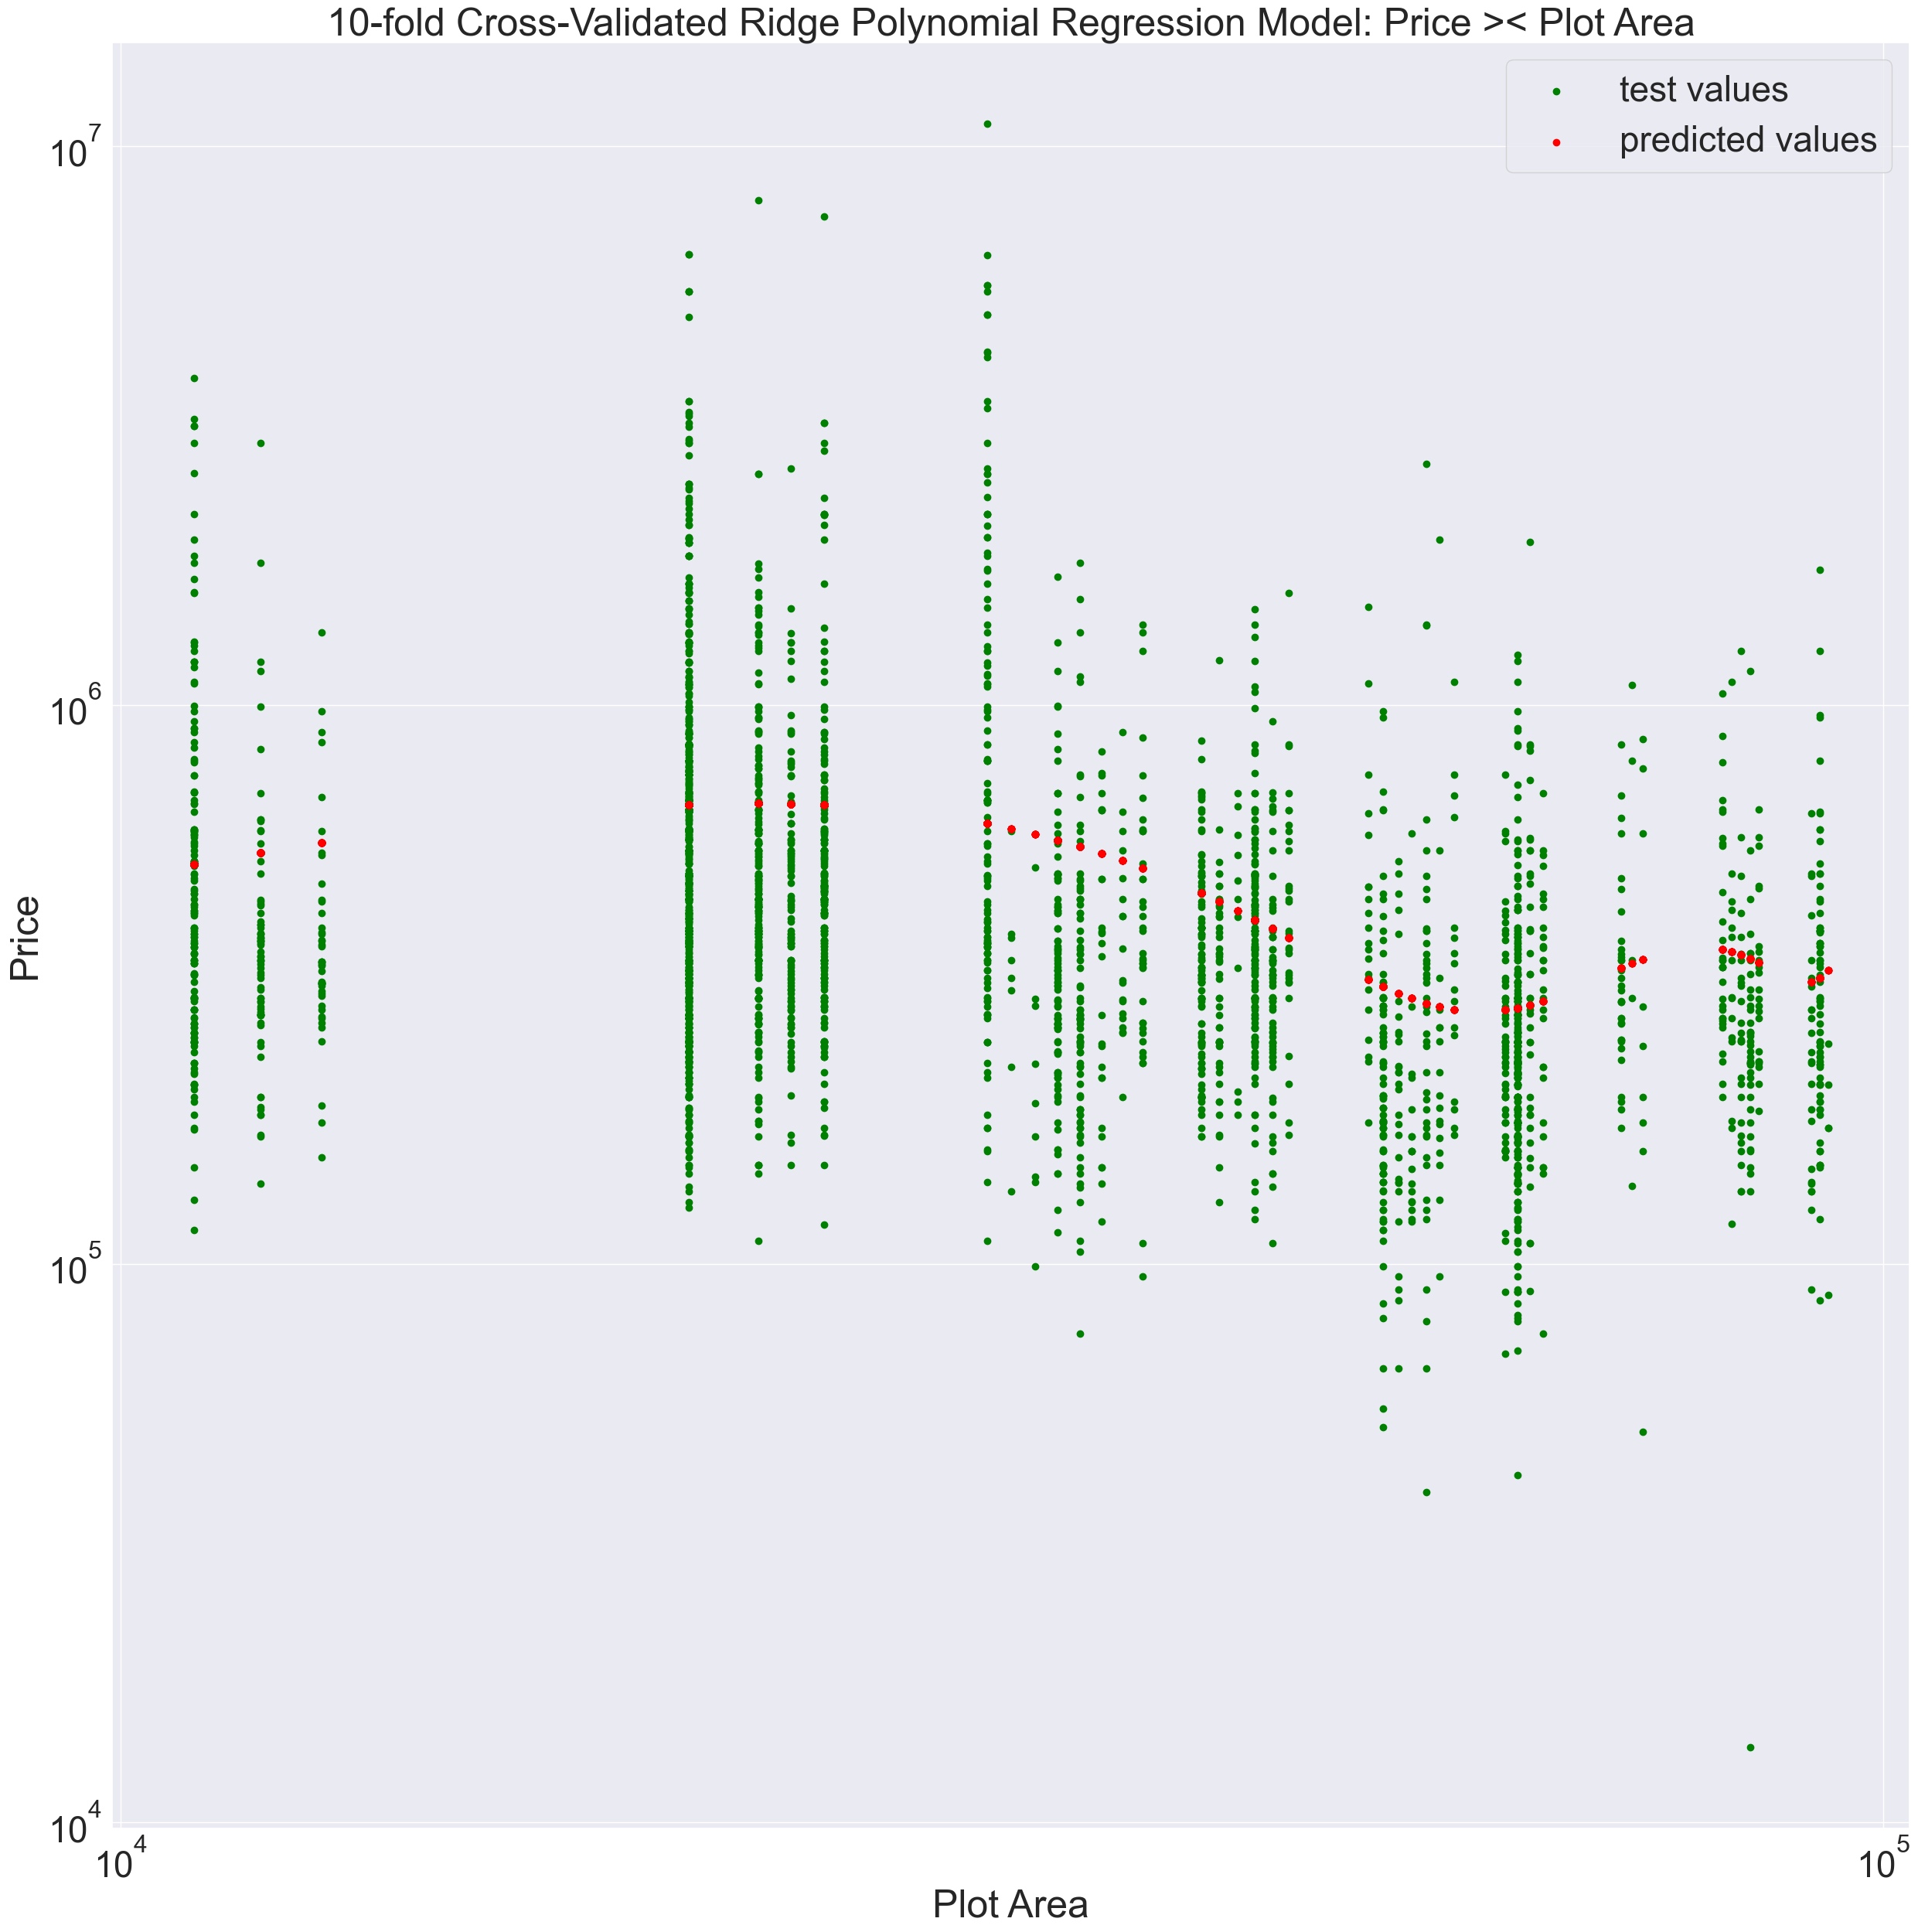

This Cross-Validated Ridge Polynomial Regression Model is 6.640430030985023 percent accurate


In [11]:
# variables to use
X = dataset_numerical.drop("price", axis=1).values
y = dataset_numerical["price"].values

# reshape variables
X_plotarea = X[:, 2].reshape(-1, 1)
y_true = y.reshape(-1, 1)

# specify degree of 2 for polynomial regression model
degree = 10
cv_fold = 10

# Create a pipeline with PolynomialFeatures, StandardScaler, and RidgeCV
poly_ridge_pipeline = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=cv_fold)  # You can specify your desired alpha values here
)

# split the variable
X_train, X_test, y_train, y_test = train_test_split(X_plotarea, y_true, test_size=0.20, random_state=30000, shuffle=True)

# fit poly_ridge_pipeline
poly_ridge_pipeline.fit(X_train, y_train)

# determine y_pred
y_pred = poly_ridge_pipeline.predict(X_test)

# visualize predictions
plt.scatter(X_test, y_test, color='green', label="test values")
plt.scatter(X_test, y_pred, color="red", label="predicted values")
plt.title(f"{cv_fold}-fold Cross-Validated Ridge Polynomial Regression Model: Price >< Plot Area")
plt.xlabel("Plot Area")
plt.ylabel("Price")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

r_squared_score = poly_ridge_pipeline.score(X_test, y_test)
print(f"This Cross-Validated Ridge Polynomial Regression Model is {r_squared_score*100} percent accurate")

## PRICE >< HABITABLE_AREA through linear regression

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

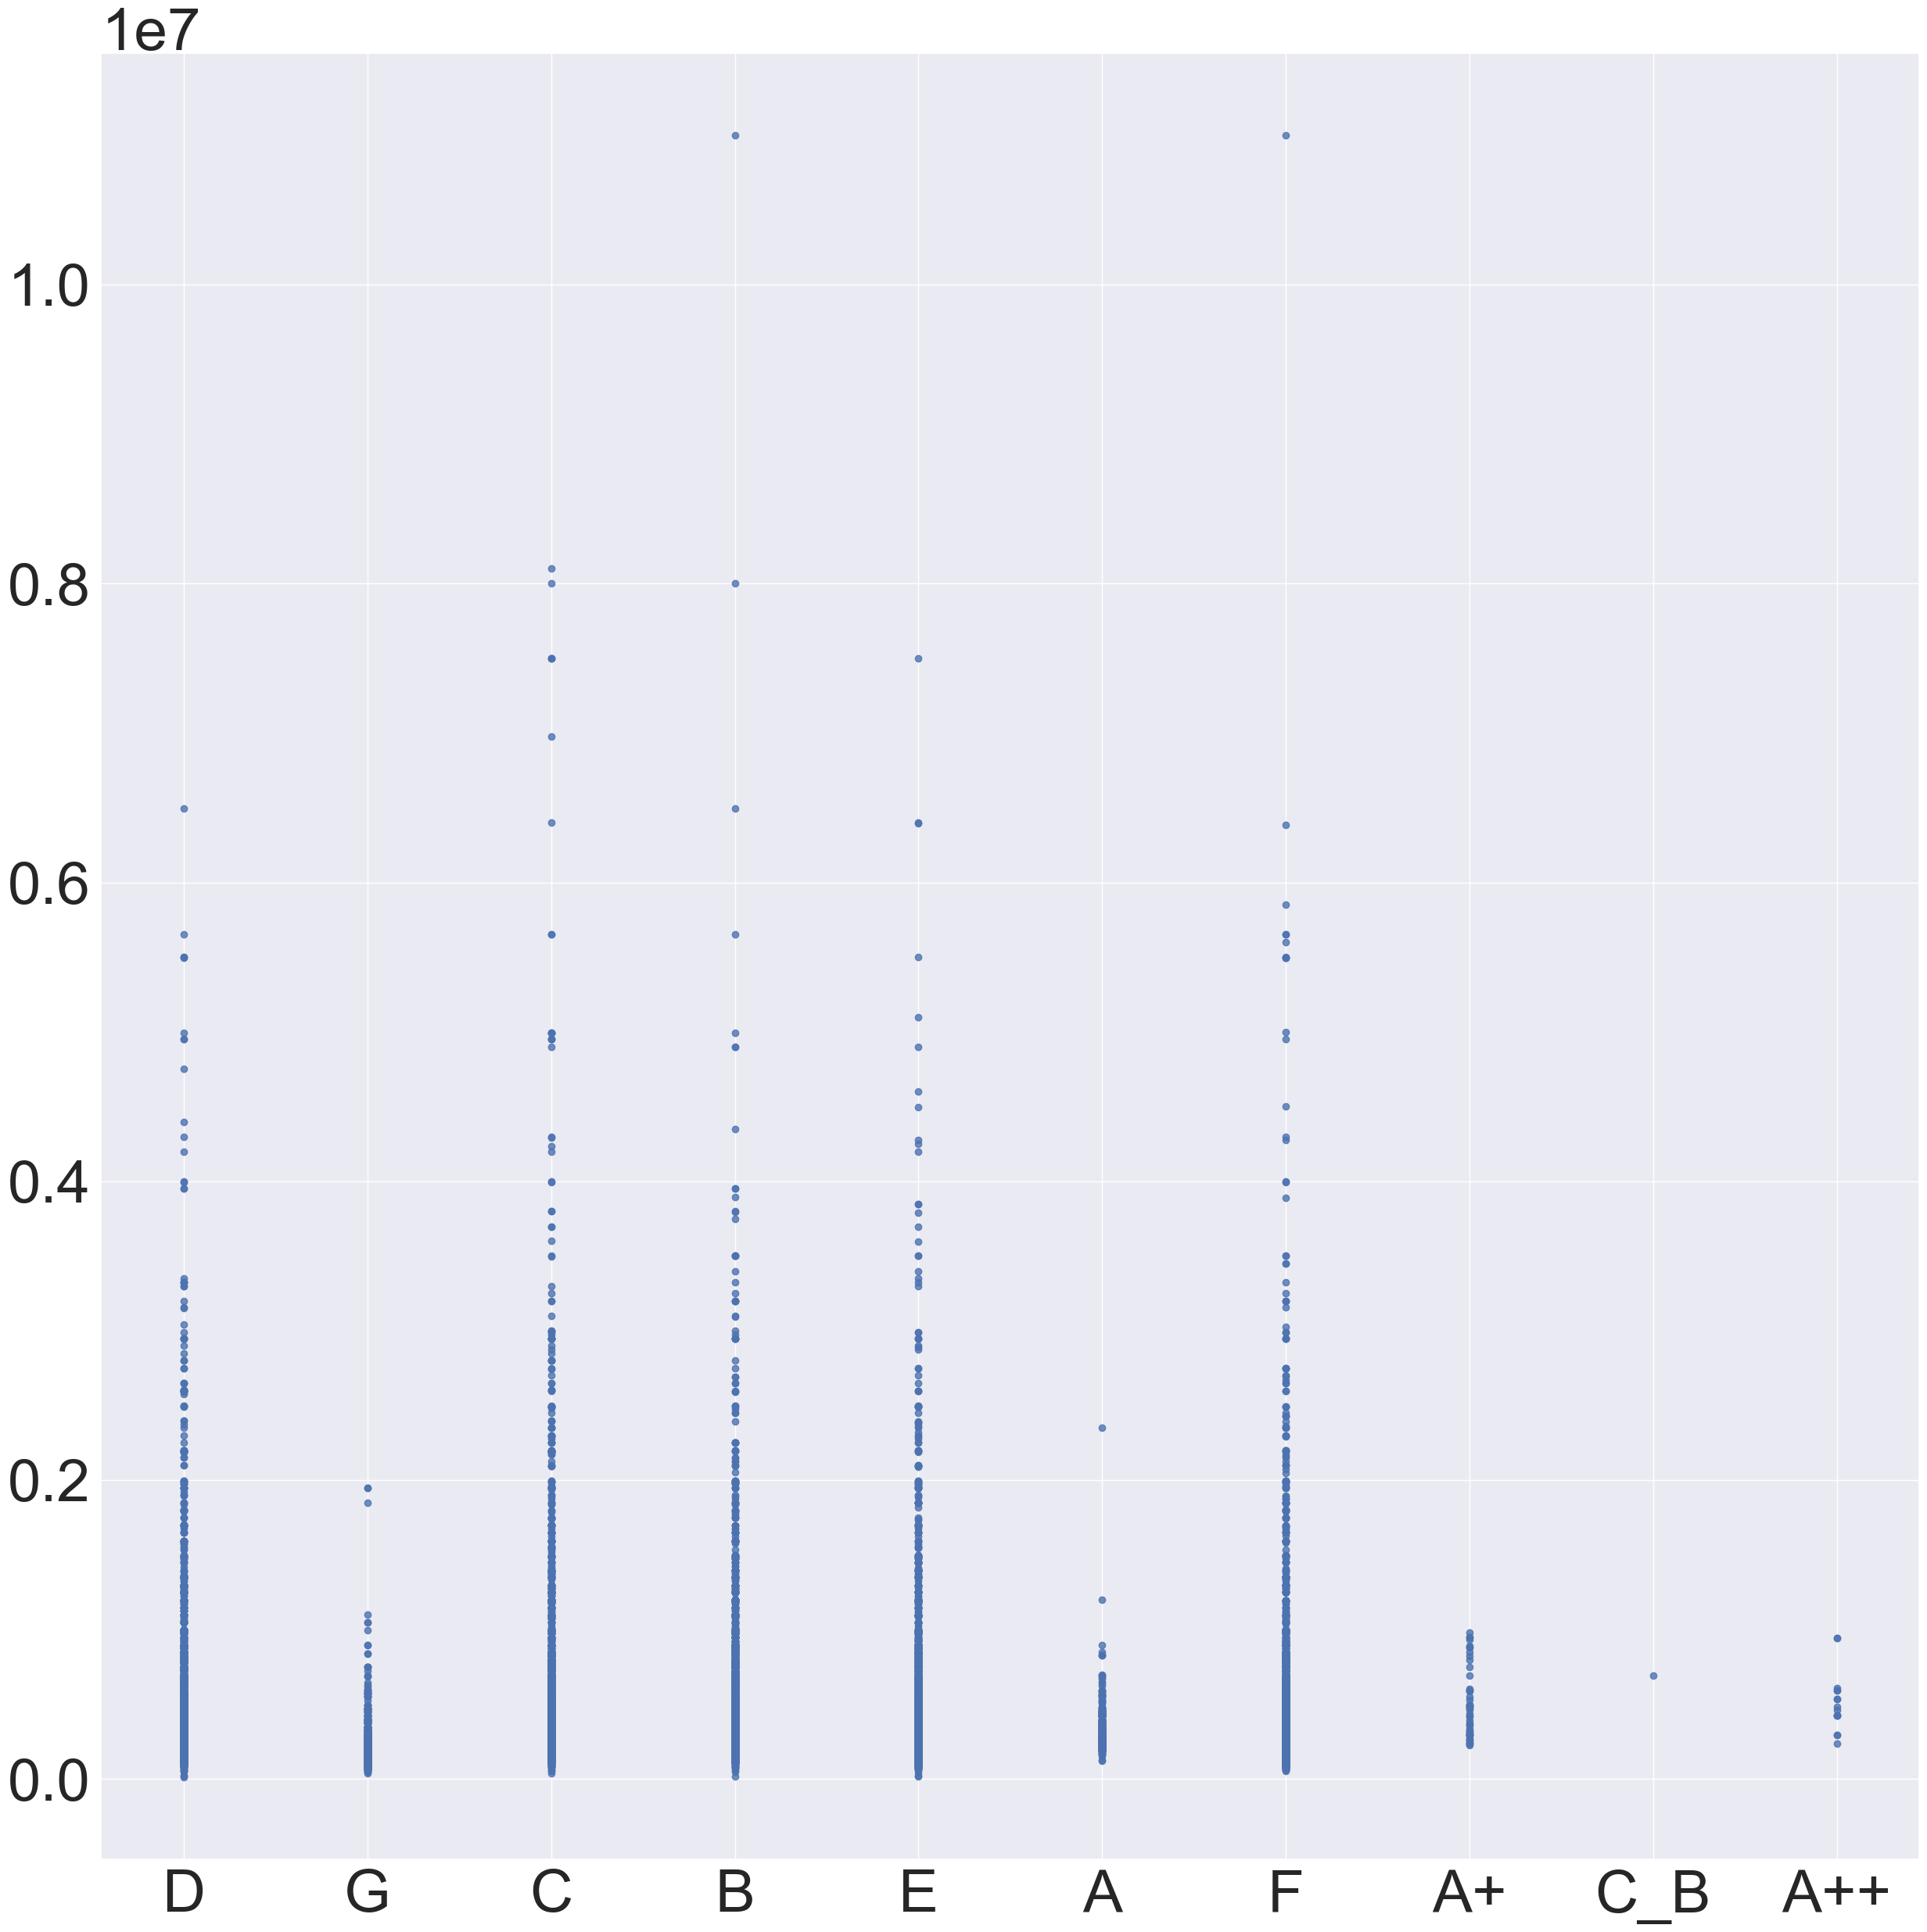

In [12]:
X_habitable = X[:,3].reshape(-1,1)
y_true = y_true

# preliminary scater plot
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={"figure.figsize":(30,30)})
sns.set(font_scale=5)
sns.regplot(x=X_habitable, y=y_true, line_kws={'color':'black'})
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Habitable Surface")
plt.ylabel("Price")
plt.title("Price >< Habitable Surface - Preliminary Scatterplot")
plt.show()

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X_habitable, y_true, test_size=0.30, random_state=42, shuffle=True)

## fitting training
reg = LinearRegression()
reg.fit(X_train, y_train)

# testing model
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_pred = reg.predict(X_test)

# visualize predictions
plt.scatter(X_train, y_train, color="darkblue")
plt.scatter(X_test, y_pred, color="red")
plt.title("Linear Regression : Price >< Habitable Surface")
plt.xlabel("Plot Area")
plt.ylabel("Price")
plt.xscale("log")
plt.yscale("log")
plt.show()

# EVALUATION
r_squared_score = reg.score(X_test, y_test)

print(f"This Linear Regression Model is {r_squared_score*100} percent accurate")

## N-fold Cross-Validation
cv_fold = 5
cv_result_mean = np.mean(cross_val_score(reg, X_habitable, y_true, cv=cv_fold))
print(f"After passing through {cv_fold}-fold Cross Validation, this Linear Regression Model is {cv_result_mean*100} percent accurate")


### REGULARIZING THE LINEAR REGRESSION MODEL USING CROSS-VALIDATED RIDGE REGRESSION

Best alpha: 10.0
Ridge score: 0.04669304958983833


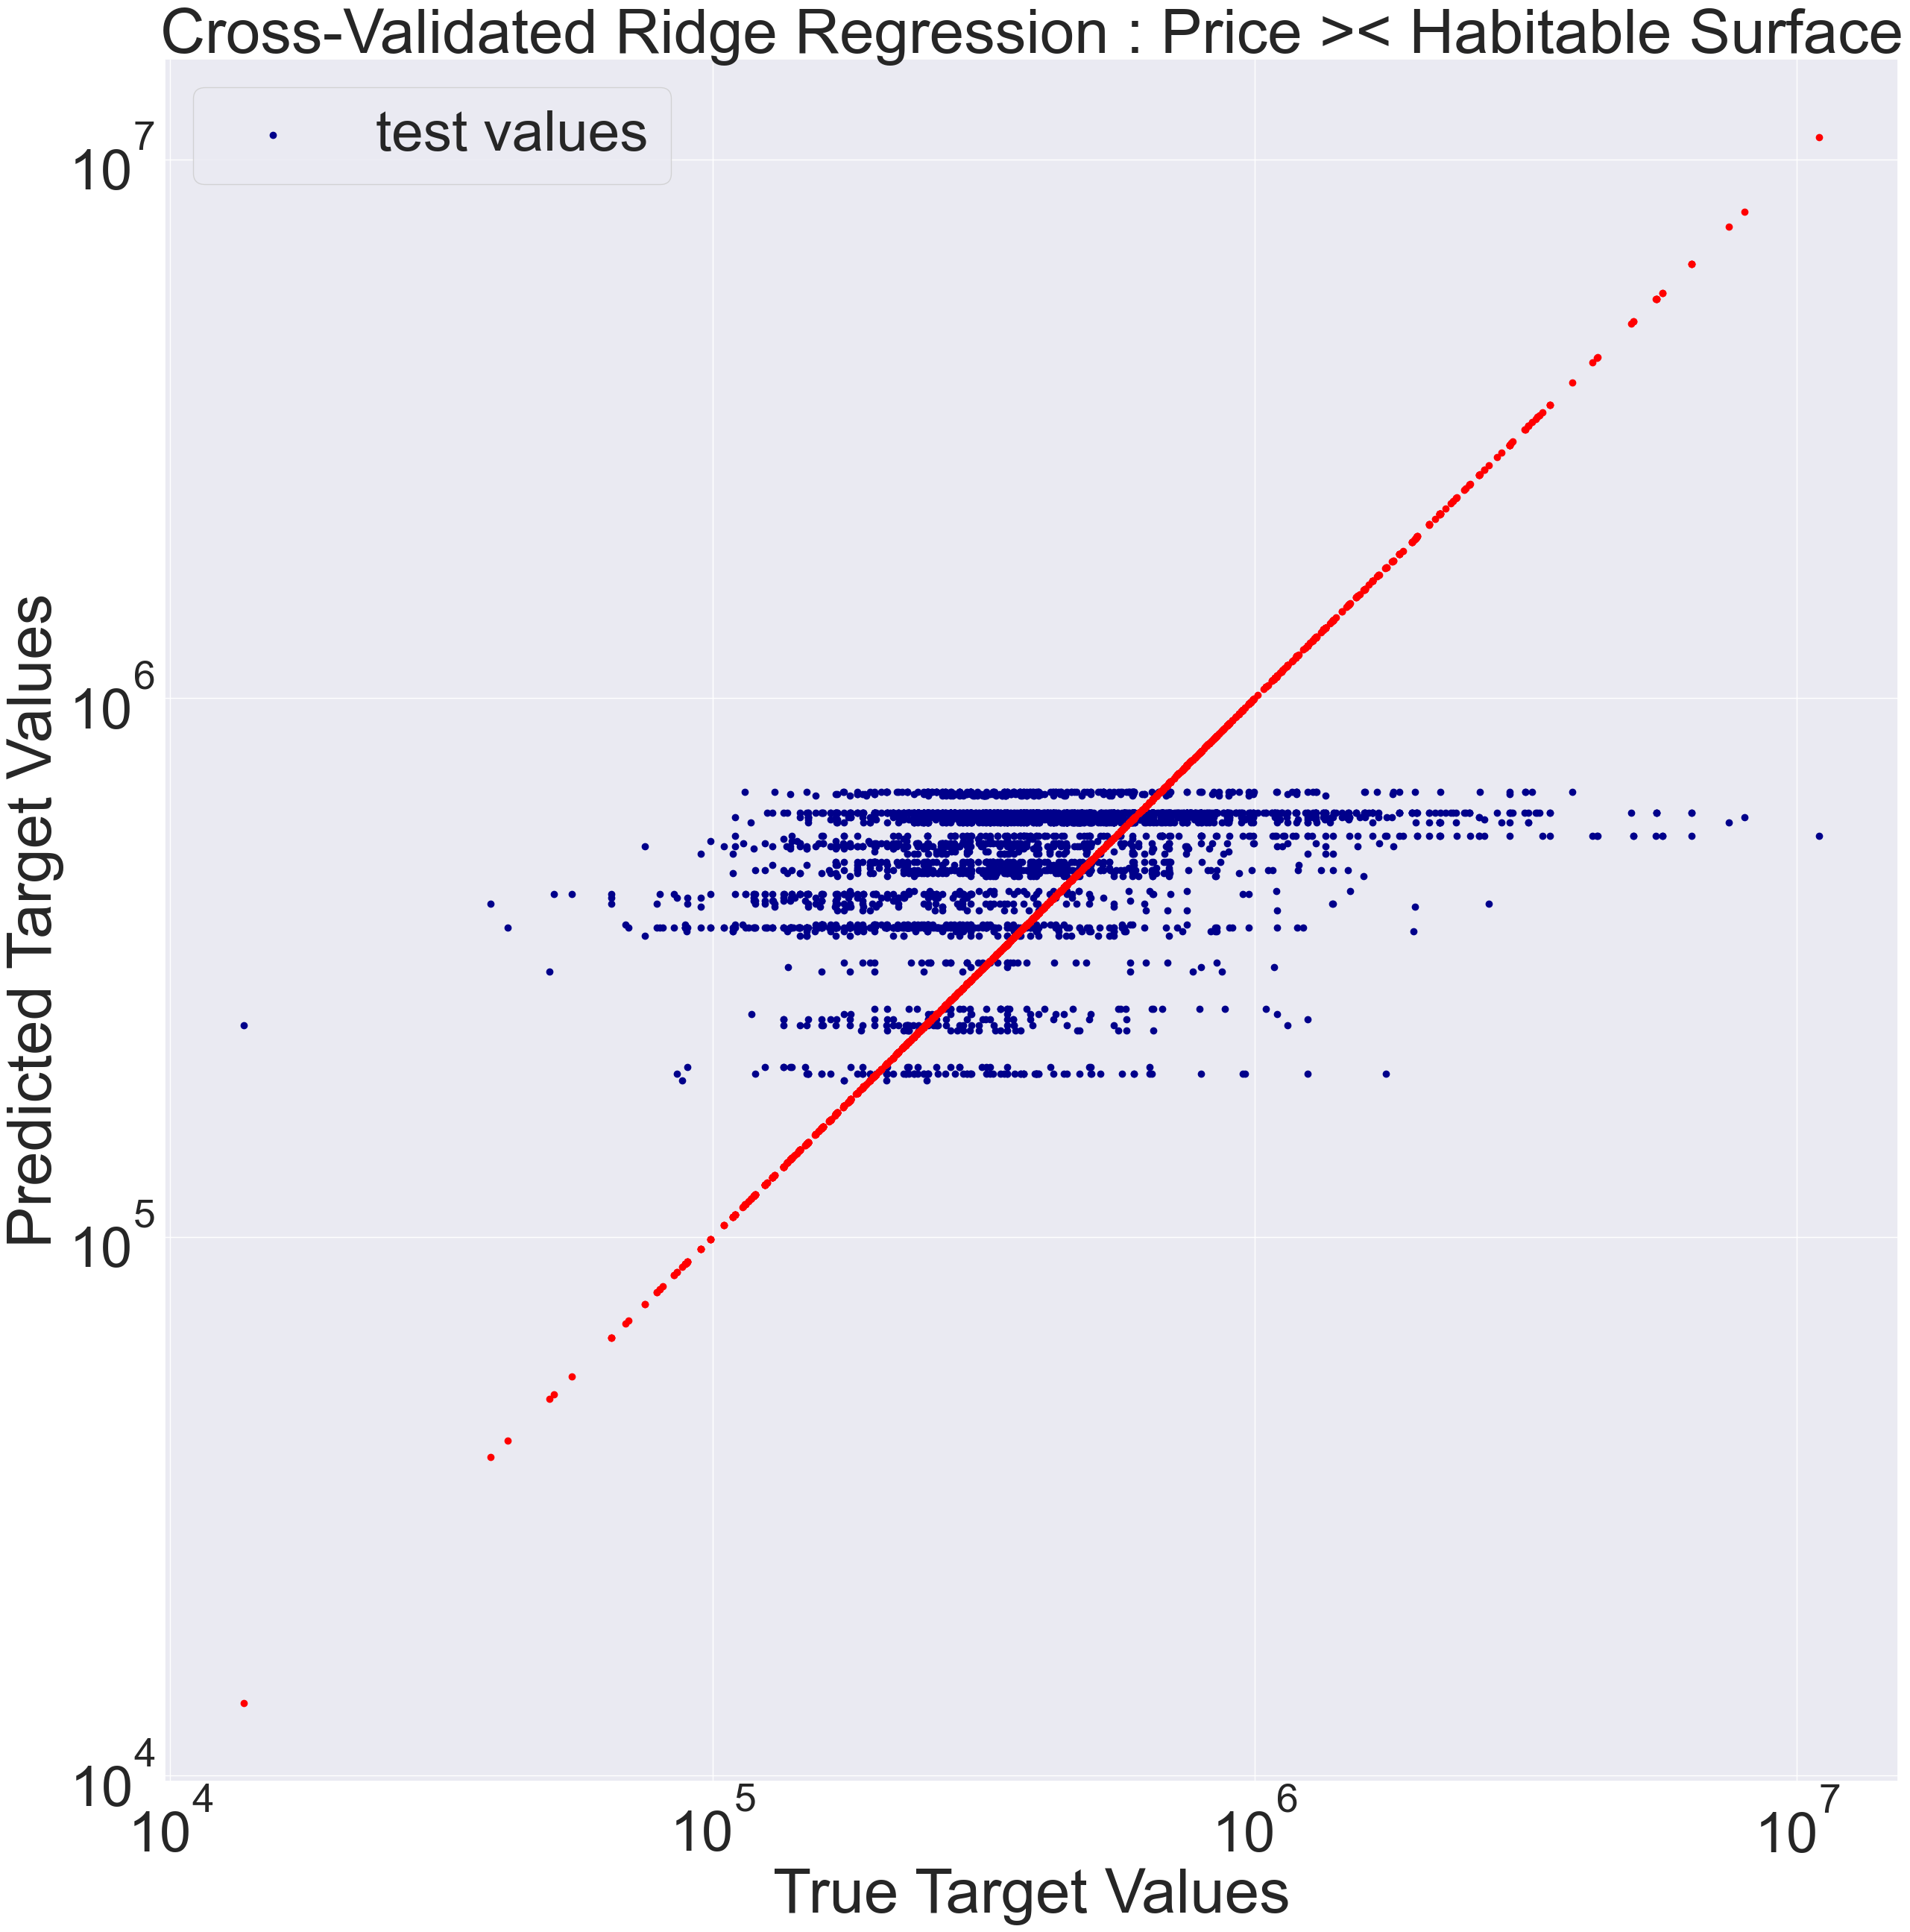

In [13]:
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.linear_model import RidgeCV

# Custom estimator to wrap RidgeCV
class RidgeCVWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, alphas=[0.1], cv=None):
        self.ridge_cv = RidgeCV(alphas=alphas, cv=cv)

    def fit(self, X, y):
        self.ridge_cv.fit(X, y)
        return self

    def predict(self, X):
        return self.ridge_cv.predict(X)

# Create the pipeline with the custom estimator
cv_fold = 6
ridge_pipeline = make_pipeline(
    StandardScaler(),                   # Normalize the data
    RidgeCVWrapper(alphas=[0.1, 1.0, 10.0], cv=cv_fold)   # Perform cross-validated ridge regression
)

# Fit the pipeline to the training data
ridge_pipeline.fit(X_train, y_train)

# Predict on the test data
ridged_y_pred = ridge_pipeline.predict(X_test)

# Get the best alpha value from the cross-validation
best_alpha = ridge_pipeline.named_steps['ridgecvwrapper'].ridge_cv.alpha_

# Get the score of the best ridge model
ridged_score = ridge_pipeline.score(X_test, y_test)

print(f"Best alpha: {best_alpha}")
print(f"Ridge score: {ridged_score}")


# VISUALIZE PREDICTION

plt.scatter(y_test, ridged_y_pred, color='darkblue', label='test values')
plt.scatter(y_test, y_test, color='red')  # Diagonal line (perfect prediction)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Cross-Validated Ridge Regression : Price >< Habitable Surface')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()



## MULTIPLE NONLINEAR REGRESSION MODEL USING XGBoost

In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

pimp_data = PimpMyData()
dataset_numerical = pimp_data.dataframe_generator("data", "continuous.csv")

# variables to use
data_to_use = dataset_numerical
data_to_use.drop("price_per_sqmeter", axis=1)
y = data_to_use["price"].values
X = data_to_use.drop("price", axis=1).values


# TRAINING MODEL

## Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create the pipeline
xgb_pipe = make_pipeline(
    PolynomialFeatures(degree=8), 
    StandardScaler(),
    xgb.XGBRegressor(random_state=20)
)

# Fit the pipeline
xgb_pipe.fit(X_train, y_train)

# Testing model
y_pred = xgb_pipe.predict(X_test)

# Reshape predicted values
y_pred_reshaped = y_pred.reshape(-1, 1)

# Sort the test data points based on feature values
sort_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sort_indices]
y_test_sorted = y_test[sort_indices]
y_pred_sorted = y_pred[sort_indices]

# Visualize predictions
plt.scatter(X_test_sorted[:, 0], y_test_sorted, color="darkblue", label="test data")
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color="red", label="XGBoost regression line")
plt.title("XGBoost Regression with Polynomial Features")
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

# Evaluation
r_squared_score = xgb_pipe.score(X_test, y_test)
print(f"This XGBoost Regression Model is {r_squared_score*100:.2f} percent accurate")

# N-fold Cross-Validation
cv_fold = 10
cv_result_mean = np.mean(cross_val_score(xgb_pipe, X, y, cv=cv_fold))
print(f"After passing through {cv_fold}-fold Cross Validation, this XGBoost Regression Model is {cv_result_mean*100:.2f} percent accurate")


ValueError: could not convert string to float: "Rue de l'Union  14"

In [ ]:
data_to_use.columns

This is by far the best model that I have built so far, at an impressive 99.8 percent Accuracy. However, There is a possibility of overfitting here, due to the fact embedding polynomial features in to the training set, the data is scaled using Standard Scaler and it could also be assumed that XGBoost is a powerful non-linear machine learning algorithm

In [ ]:
import pickle
with open("trained_xgb_pipeline-0.1.0.pkl", "wb") as tp:
    pickle.dump(xgb_pipe, tp)


# CONCLUSION 

It has been very interesting to know that the possibility is endless when it comes to deploying supervised machine learning model to predict property prices. However, the biggest lesson that can be taken from here is that every training model has its own flaws. There are caveats to every machine learning model, phenomena like overfitting, underfitting should be a clear indicator to all machine learning model should be taken with a grain of salt. 